<a href="https://colab.research.google.com/github/YuXuan0606/YuXuan/blob/main/Gender_Differences_in_Optical_Illusion_Perception_and_Gender_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gender Differences in Optical Illusion Perception Analysis

### Research Question

Is there a significant difference in the way male and female participants perceive a set of optical illusion stimuli, and can this difference be used to predict gender?

### Hypotheses



#### H₀ (Null Hypothesis)
There is no significant difference in the way male and female participants perceive a set of optical illusion stimuli, and gender cannot be predicted based on these differences.

#### H₁ (Alternative Hypothesis):
There is a significant difference in the way male and female participants perceive a set of optical illusion stimuli, and this difference can be used to predict gender.


# 1 Data Loading and Initial Exploration

Change the name of the columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Update the path to wherever your file is in your Google Drive
file_path = '/content/drive/MyDrive/Y2S2/WID2003 COGNITIVE SCIENCE/GROUP ASSIGNMENT/Optical_Illusion Data export.tsv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path, sep="\t")

# Show the first few rows to verify
df[1000:2001].head()


<ipython-input-2-2153759464>:7: DtypeWarning: Columns (74,75,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Recording timestamp  Computer timestamp       Sensor      Project name  \
1000              7278677         71036647366  Eye Tracker  Optical_Illusion   
1001              7287010         71036655699  Eye Tracker  Optical_Illusion   
1002              7295335         71036664024  Eye Tracker  Optical_Illusion   
1003              7303668         71036672357  Eye Tracker  Optical_Illusion   
1004              7312001         71036680690  Eye Tracker  Optical_Illusion   

     Export date Participant name Gender Recording name Recording date  \
1000    6/6/2025               P1   Male     Recording3      4/30/2025   
1001    6/6/2025               P1   Male     Recording3      4/30/2025   
1002    6/6/2025               P1   Male     Recording3      4/30/2025   
1003    6/6/2025               P1   Male     Recording3      4/30/2025   
1004    6/6/2025               P1   Male     Recording3      4/30/2025   

     Recording date UTC  ... Client area position X (DACSpx)  \
1000          4/30/2025  ...                             NaN   
1001          4/30/2025  ...                             NaN   
1002          4/30/2025  ...                             NaN   
1003          4/30/2025  ...                             NaN   
1004          4/30/2025  ...                             NaN   

     Client area position Y (DACSpx)  Viewport position X Viewport position Y  \
1000                             NaN                  NaN                 NaN   
1001                             NaN                  NaN                 NaN   
1002                             NaN                  NaN                 NaN   
1003                             NaN                  NaN                 NaN   
1004                             NaN                  NaN                 NaN   

     Viewport width Viewport height  Full page width  Full page height  \
1000            NaN             NaN              NaN               NaN   
1001            NaN             NaN              NaN               NaN   
1002            NaN             NaN              NaN               NaN   
1003            NaN             NaN              NaN               NaN   
1004            NaN             NaN              NaN               NaN   

      Mouse position X  Mouse position Y  
1000               NaN               NaN  
1001               NaN               NaN  
1002               NaN               NaN  
1003               NaN               NaN  
1004               NaN               NaN  

[5 rows x 174 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383526 entries, 0 to 1383525
Columns: 174 entries, Recording timestamp to Mouse position Y
dtypes: float64(107), int64(47), object(20)
memory usage: 1.8+ GB


In [ ]:
# Export the first 50 rows to a CSV file
first_50_rows = df.head(50)
first_50_rows.to_csv('first_50_rows_data.csv', index=False)

print("First 50 rows exported to 'first_50_rows_data.csv'")

First 50 rows exported to 'first_50_rows_data.csv'


In [ ]:
# To Change the following column name
# AOI size [young-oldd - Rectangle]
# AOI size [young-oldd - Rectangle 1]
# AOI hit [young-oldd - Rectangle]
# AOI hit [young-oldd - Rectangle 1]
# Rectangle to YOUNG
# Rectangle 1 to OLD

df.columns = ['AOI size [young-oldd - YOUNG]' if col == 'AOI size [young-oldd - Rectangle]' else col for col in df.columns]
df.columns = ['AOI size [young-oldd - OLD]' if col == 'AOI size [young-oldd - Rectangle 1]' else col for col in df.columns]
df.columns = ['AOI hit [young-oldd - YOUNG]' if col == 'AOI hit [young-oldd - Rectangle]' else col for col in df.columns]
df.columns = ['AOI hit [young-oldd - OLD]' if col == 'AOI hit [young-oldd - Rectangle 1]' else col for col in df.columns]

df.head()

Recording timestamp  Computer timestamp       Sensor      Project name  \
0                    0         71029368689          NaN  Optical_Illusion   
1                 3519         71029372208  Eye Tracker  Optical_Illusion   
2                11857         71029380546  Eye Tracker  Optical_Illusion   
3                20190         71029388879  Eye Tracker  Optical_Illusion   
4                28523         71029397212  Eye Tracker  Optical_Illusion   

  Export date Participant name Gender Recording name Recording date  \
0    6/6/2025               P1   Male     Recording3      4/30/2025   
1    6/6/2025               P1   Male     Recording3      4/30/2025   
2    6/6/2025               P1   Male     Recording3      4/30/2025   
3    6/6/2025               P1   Male     Recording3      4/30/2025   
4    6/6/2025               P1   Male     Recording3      4/30/2025   

  Recording date UTC  ... Client area position X (DACSpx)  \
0          4/30/2025  ...                             NaN   
1          4/30/2025  ...                             NaN   
2          4/30/2025  ...                             NaN   
3          4/30/2025  ...                             NaN   
4          4/30/2025  ...                             NaN   

  Client area position Y (DACSpx)  Viewport position X Viewport position Y  \
0                             NaN                  NaN                 NaN   
1                             NaN                  NaN                 NaN   
2                             NaN                  NaN                 NaN   
3                             NaN                  NaN                 NaN   
4                             NaN                  NaN                 NaN   

  Viewport width Viewport height  Full page width  Full page height  \
0            NaN             NaN              NaN               NaN   
1            NaN             NaN              NaN               NaN   
2            NaN             NaN              NaN               NaN   
3            NaN             NaN              NaN               NaN   
4            NaN             NaN              NaN               NaN   

   Mouse position X  Mouse position Y  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 174 columns]

### List of features available

In [ ]:
for col in df.columns.tolist():
    print(col)

Recording timestamp
Computer timestamp
Sensor
Project name
Export date
Participant name
Gender
Recording name
Recording date
Recording date UTC
Recording start time
Recording start time UTC
Recording duration
Timeline name
Recording Fixation filter name
Recording software version
Recording resolution height
Recording resolution width
Recording monitor latency
Average calibration accuracy (mm)
Average calibration precision SD (mm)
Average calibration precision RMS (mm)
Average calibration accuracy (degrees)
Average calibration precision SD (degrees)
Average calibration precision RMS (degrees)
Average calibration accuracy (pixels)
Average calibration precision SD (pixels)
Average calibration precision RMS (pixels)
Average validation accuracy (mm)
Average validation precision SD (mm)
Average validation precision RMS (mm)
Average validation accuracy (degrees)
Average validation precision SD (degrees)
Average validation precision RMS (degrees)
Average validation accuracy (pixels)
Average va

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df['Gender'].value_counts(dropna=False)

Gender
Male      926708
Female    456818
Name: count, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].str.strip().str.lower()
df = df[df['Gender'].isin(['male', 'female'])]

In [ ]:
aoi_columns = [col for col in df.columns if col.startswith("AOI hit")]
aoi_data = df[aoi_columns + ['Gender']]

In [ ]:
# AOI hits are often strings or booleans
# Convert them to numeric
aoi_data[aoi_columns] = aoi_data[aoi_columns].apply(pd.to_numeric, errors='coerce')

<ipython-input-11-3151066708>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aoi_data[aoi_columns] = aoi_data[aoi_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
aoi_by_gender = aoi_data.groupby("Gender")[aoi_columns].sum().T


In [ ]:
aoi_by_gender = aoi_by_gender.fillna(0).astype(int)

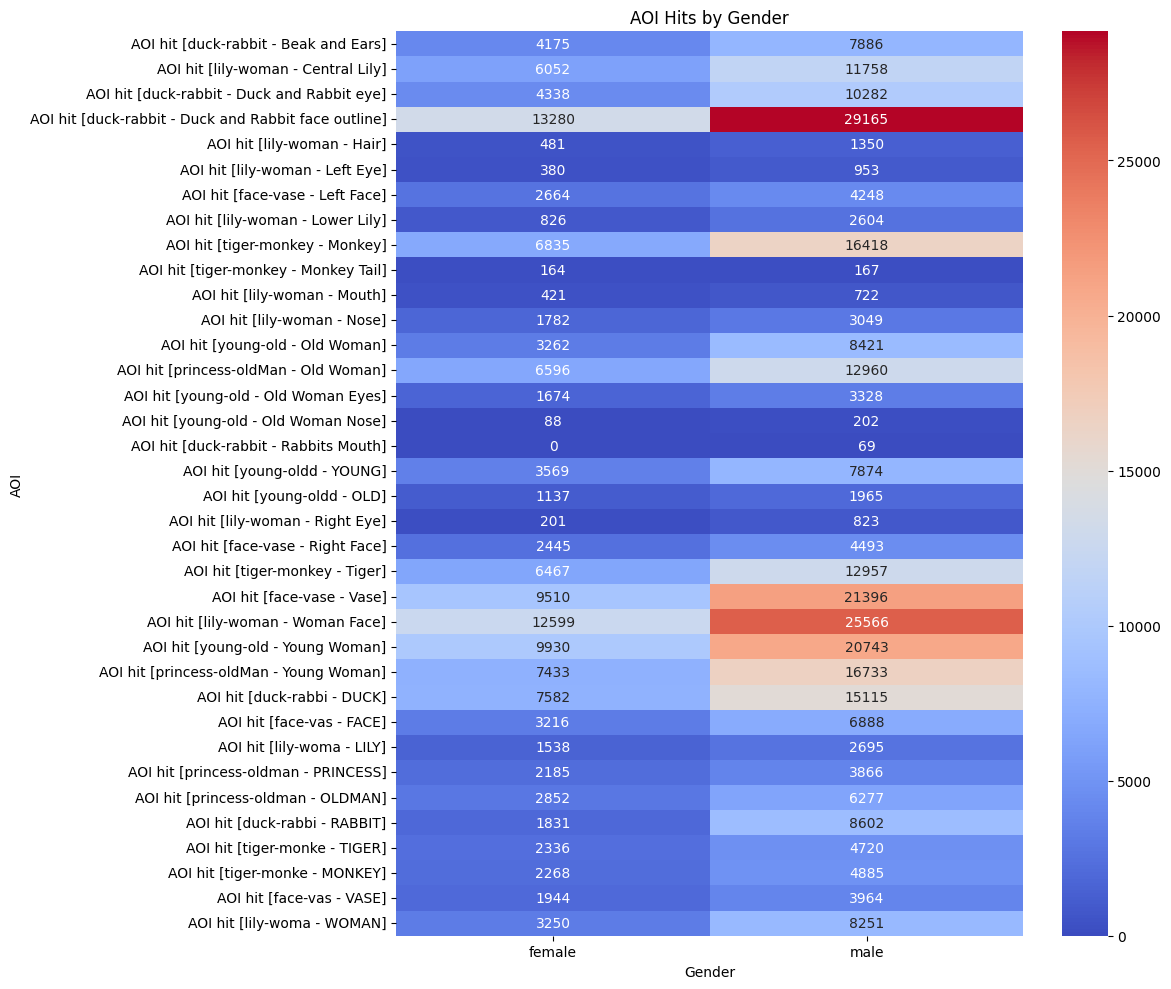

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(aoi_by_gender, annot=True, fmt="d", cmap="coolwarm")
plt.title("AOI Hits by Gender")
plt.xlabel("Gender")
plt.ylabel("AOI")
plt.tight_layout()
plt.show()

Observations:

1. Males tend to have significantly more hits in most AOIs, especially in complex.

2. AOIs like "duck-rabbit - Rabbits Mouth” and “young-old - Old Woman Nose” received very few hits from both genders, indicating low attention or difficulty in perception.

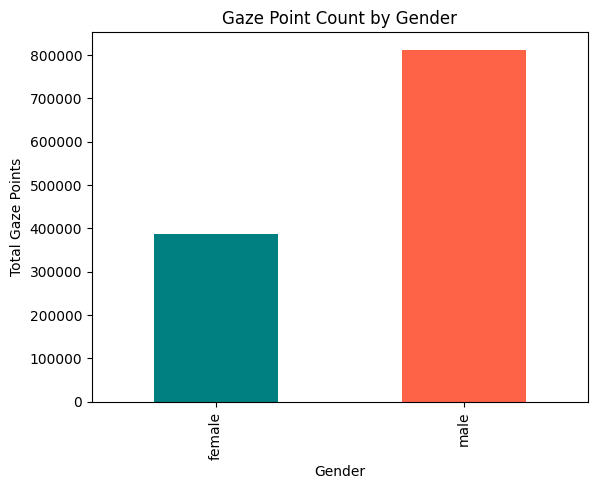

In [ ]:
gaze_points = df[['Gender', 'Gaze point X', 'Gaze point Y']].dropna()
gaze_count = gaze_points.groupby('Gender').size()

gaze_count.plot(kind='bar', color=['teal', 'tomato'])
plt.title("Gaze Point Count by Gender")
plt.ylabel("Total Gaze Points")
plt.show()


Observations:
1. There is an imbalance in the gender distribution of participants, which results in a significant difference in the number of gaze points between males and females.


<ipython-input-16-2542688320>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Pupil diameter filtered', data=df, palette=['dodgerblue', 'lightcoral'])


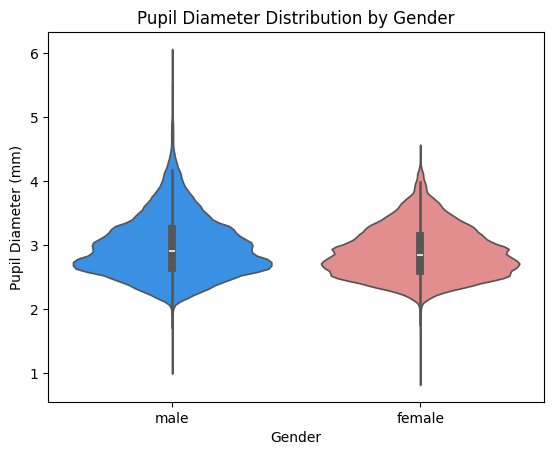

In [ ]:
sns.violinplot(x='Gender', y='Pupil diameter filtered', data=df, palette=['dodgerblue', 'lightcoral'])
plt.title("Pupil Diameter Distribution by Gender")
plt.ylabel("Pupil Diameter (mm)")
plt.show()

Observations:
1. This plot shows that both males and females have similar pupil diameter distributions.
2. However, males have a slightly higher median and a wider range, with more extreme values.

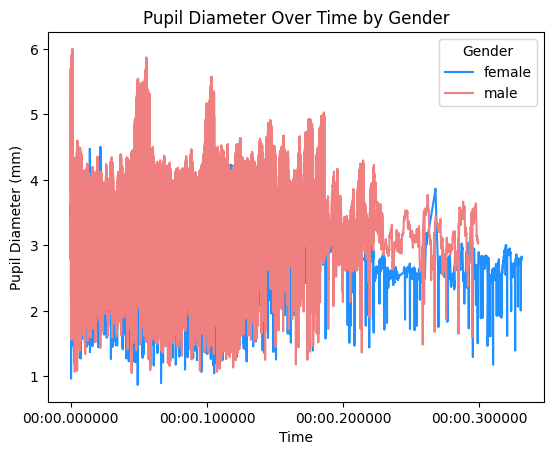

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Recording timestamp'])  # if needed, convert timestamp

pupil_time = df.groupby(['Timestamp', 'Gender'])['Pupil diameter filtered'].mean().reset_index()

sns.lineplot(data=pupil_time, x='Timestamp', y='Pupil diameter filtered', hue='Gender', palette=['dodgerblue', 'lightcoral'])
plt.title("Pupil Diameter Over Time by Gender")
plt.ylabel("Pupil Diameter (mm)")
plt.xlabel("Time")
plt.show()


Observations:
1. Male pupils generally show larger and more fluctuating diameters throughout the time period.

2. Female pupils stay more stable and lower in diameter overall.

3. The plot suggests that males may have had stronger or more variable responses to visual stimuli compared to females during the observation.

# 2 Data Cleaning

Retain data from `Eye Tracker` only

In [ ]:
# Remove data entries where the 'Sensor' column is 'Mouse' or NaN
df_cleaned = df[df['Sensor'].notna() & (df['Sensor'] != 'Mouse')].copy()

print("Shape of original DataFrame:", df.shape)
print("Shape of DataFrame after removing 'Mouse' and NaN sensor entries:", df_cleaned.shape)

Shape of original DataFrame: (1383526, 175)
Shape of DataFrame after removing 'Mouse' and NaN sensor entries: (1312187, 175)


### Remove `EyesNotFound` and `nan` in column `Eye movement type` data entries

In [ ]:
if 'Eye movement type' in df.columns:
    unique_eye_movement_types = df_cleaned['Eye movement type'].unique()
    print("Unique values in 'Eye movement type' column:")
    print(unique_eye_movement_types)
else:
    print("'Eye movement type' column not found in the DataFrame.")

Unique values in 'Eye movement type' column:
['Fixation' 'Saccade' 'Unclassified' 'EyesNotFound']


### Remove the data entries with value `nan`, `Unclassified` and `EyesNotFound`

In [ ]:
df_cleaned = df_cleaned[
    ~df_cleaned['Eye movement type'].isin(['EyesNotFound', 'Unclassified']) &
    df_cleaned['Eye movement type'].notna()
].copy()

print("Shape of DataFrame after removing 'EyesNotFound', 'Unclassified', and NaN eye movement type entries:", df_cleaned.shape)

Shape of DataFrame after removing 'EyesNotFound', 'Unclassified', and NaN eye movement type entries: (1175030, 175)


### Drop unused columns

In [ ]:
import pandas as pd

# Columns to drop
columns_to_drop = [
    "Sensor",
    "Project name",
    "Export date",
    "Recording name",
    "Recording date",
    "Recording date UTC",
    "Timeline name",
    "Recording Fixation filter name",
    "Recording software version",
    "Recording resolution height",
    "Recording resolution width",
    "Recording monitor latency",
    "Event",
    "Event value",
    "Original Media width",
    "Original Media height",
    "Ungrouped",
    "Client area position X (DACSpx)",
    "Client area position Y (DACSpx)",
    "Viewport position X",
    "Viewport position Y",
    "Viewport width",
    "Viewport height",
    "Full page width",
    "Full page height",
    "Mouse position X",
    "Mouse position Y"
]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors="ignore")

# Check the shape after dropping
print("Remaining columns:", df_cleaned.shape[1])

# Inspect the first few rows of the cleaned dataset
print(df_cleaned.head())

# Check for any missing values after dropping columns
print(df_cleaned.isnull().sum())


Remaining columns: 148
   Recording timestamp  Computer timestamp Participant name Gender  \
1                 3519         71029372208               P1   male   
2                11857         71029380546               P1   male   
3                20190         71029388879               P1   male   
4                28523         71029397212               P1   male   
5                36857         71029405546               P1   male   

  Recording start time Recording start time UTC  Recording duration  \
1         12:10:46.697             04:10:46.697              129318   
2         12:10:46.697             04:10:46.697              129318   
3         12:10:46.697             04:10:46.697              129318   
4         12:10:46.697             04:10:46.697              129318   
5         12:10:46.697             04:10:46.697              129318   

   Average calibration accuracy (mm)  Average calibration precision SD (mm)  \
1                                8.6              

### List of features left after dropping unused columns

In [ ]:
for col in df_cleaned.columns.tolist():
    print(col)

Recording timestamp
Computer timestamp
Participant name
Gender
Recording start time
Recording start time UTC
Recording duration
Average calibration accuracy (mm)
Average calibration precision SD (mm)
Average calibration precision RMS (mm)
Average calibration accuracy (degrees)
Average calibration precision SD (degrees)
Average calibration precision RMS (degrees)
Average calibration accuracy (pixels)
Average calibration precision SD (pixels)
Average calibration precision RMS (pixels)
Average validation accuracy (mm)
Average validation precision SD (mm)
Average validation precision RMS (mm)
Average validation accuracy (degrees)
Average validation precision SD (degrees)
Average validation precision RMS (degrees)
Average validation accuracy (pixels)
Average validation precision SD (pixels)
Average validation precision RMS (pixels)
AOI size [duck-rabbit - Beak and Ears]
AOI size [lily-woman - Central Lily]
AOI size [duck-rabbit - Duck and Rabbit eye]
AOI size [duck-rabbit - Duck and Rabbit 

In [ ]:
# Sort the original df DataFrame by Participant name and Recording timestamp
df_cleaned = df_cleaned.sort_values(by=["Participant name", "Recording timestamp"]).copy()

print("\nOriginal DataFrame sorted by Participant name and Recording timestamp:")
display(df_cleaned.head())


Original DataFrame sorted by Participant name and Recording timestamp:


Recording timestamp  Computer timestamp Participant name Gender  \
1                 3519         71029372208               P1   male   
2                11857         71029380546               P1   male   
3                20190         71029388879               P1   male   
4                28523         71029397212               P1   male   
5                36857         71029405546               P1   male   

  Recording start time Recording start time UTC  Recording duration  \
1         12:10:46.697             04:10:46.697              129318   
2         12:10:46.697             04:10:46.697              129318   
3         12:10:46.697             04:10:46.697              129318   
4         12:10:46.697             04:10:46.697              129318   
5         12:10:46.697             04:10:46.697              129318   

   Average calibration accuracy (mm)  Average calibration precision SD (mm)  \
1                                8.6                                    2.0   
2                                8.6                                    2.0   
3                                8.6                                    2.0   
4                                8.6                                    2.0   
5                                8.6                                    2.0   

   Average calibration precision RMS (mm)  ...  AOI hit [face-vas - FACE]  \
1                                     2.4  ...                        NaN   
2                                     2.4  ...                        NaN   
3                                     2.4  ...                        NaN   
4                                     2.4  ...                        NaN   
5                                     2.4  ...                        NaN   

   AOI hit [lily-woma - LILY]  AOI hit [princess-oldman - PRINCESS]  \
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   
5                         NaN                                   NaN   

   AOI hit [princess-oldman - OLDMAN]  AOI hit [duck-rabbi - RABBIT]  \
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
5                                 NaN                            NaN   

   AOI hit [tiger-monke - TIGER]  AOI hit [tiger-monke - MONKEY]  \
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   
5                            NaN                             NaN   

   AOI hit [face-vas - VASE]  AOI hit [lily-woma - WOMAN]  \
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   

                      Timestamp  
1 1970-01-01 00:00:00.000003519  
2 1970-01-01 00:00:00.000011857  
3 1970-01-01 00:00:00.000020190  
4 1970-01-01 00:00:00.000028523  
5 1970-01-01 00:00:00.000036857  

[5 rows x 148 columns]

### Retain data entries recorded during stimuli shown only

Drop data entries when non-stimuli images are shown

In [ ]:
# Define the list of stimulus names to keep
stimuli_to_keep = [
    'duck-rabbit',
    'face-vase',
    'lily-woman',
    'princess-oldMan',
    'tiger-monkey',
    'young-old'
]

# Filter the DataFrame to keep only rows with the specified stimulus names
df_filtered_stimuli = df_cleaned[df_cleaned['Presented Stimulus name'].isin(stimuli_to_keep)].copy()

# Display the shape of the original and filtered DataFrames to see the effect
print("Original DataFrame shape:", df_cleaned.shape)
print("Filtered DataFrame shape:", df_filtered_stimuli.shape)

# Display the unique stimulus names in the filtered DataFrame to verify
print("\nUnique stimulus names in the filtered DataFrame:")
print(df_filtered_stimuli['Presented Stimulus name'].unique())

Original DataFrame shape: (1175030, 148)
Filtered DataFrame shape: (295208, 148)

Unique stimulus names in the filtered DataFrame:
['duck-rabbit' 'face-vase' 'lily-woman' 'princess-oldMan' 'tiger-monkey'
 'young-old']


In [ ]:
print("Before dropping: ")
df_cleaned.info()

Before dropping: 
<class 'pandas.core.frame.DataFrame'>
Index: 1175030 entries, 1 to 182522
Columns: 148 entries, Recording timestamp to Timestamp
dtypes: datetime64[ns](1), float64(93), int64(45), object(9)
memory usage: 1.3+ GB


In [ ]:
print("After dropping: ")
df_filtered_stimuli.info()

After dropping: 
<class 'pandas.core.frame.DataFrame'>
Index: 295208 entries, 9826 to 182196
Columns: 148 entries, Recording timestamp to Timestamp
dtypes: datetime64[ns](1), float64(93), int64(45), object(9)
memory usage: 335.6+ MB


### Reset the index after filtering

In [ ]:
# Reindex the df_filtered_stimuli DataFrame
df_filtered_stimuli = df_filtered_stimuli.reset_index(drop=True)

print("DataFrame df_filtered_stimuli reindexed.")
display(df_filtered_stimuli.head())

DataFrame df_filtered_stimuli reindexed.


Recording timestamp  Computer timestamp Participant name Gender  \
0             75855225         71105223914               P1   male   
1             75863558         71105232247               P1   male   
2             75871901         71105240590               P1   male   
3             75880225         71105248914               P1   male   
4             75888558         71105257247               P1   male   

  Recording start time Recording start time UTC  Recording duration  \
0         12:10:46.697             04:10:46.697              129318   
1         12:10:46.697             04:10:46.697              129318   
2         12:10:46.697             04:10:46.697              129318   
3         12:10:46.697             04:10:46.697              129318   
4         12:10:46.697             04:10:46.697              129318   

   Average calibration accuracy (mm)  Average calibration precision SD (mm)  \
0                                8.6                                    2.0   
1                                8.6                                    2.0   
2                                8.6                                    2.0   
3                                8.6                                    2.0   
4                                8.6                                    2.0   

   Average calibration precision RMS (mm)  ...  AOI hit [face-vas - FACE]  \
0                                     2.4  ...                        NaN   
1                                     2.4  ...                        NaN   
2                                     2.4  ...                        NaN   
3                                     2.4  ...                        NaN   
4                                     2.4  ...                        NaN   

   AOI hit [lily-woma - LILY]  AOI hit [princess-oldman - PRINCESS]  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

   AOI hit [princess-oldman - OLDMAN]  AOI hit [duck-rabbi - RABBIT]  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   

   AOI hit [tiger-monke - TIGER]  AOI hit [tiger-monke - MONKEY]  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   AOI hit [face-vas - VASE]  AOI hit [lily-woma - WOMAN]  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

                      Timestamp  
0 1970-01-01 00:00:00.075855225  
1 1970-01-01 00:00:00.075863558  
2 1970-01-01 00:00:00.075871901  
3 1970-01-01 00:00:00.075880225  
4 1970-01-01 00:00:00.075888558  

[5 rows x 148 columns]

### Retain rows with only Valid in both Validity Left and Validity Right

In [ ]:
# Print number of rows before filtering
print("Rows before filtering:", df_filtered_stimuli.shape[0])

# Keep only rows where both validity columns are "Valid"
df_filtered_stimuli = df_filtered_stimuli[
    (df_filtered_stimuli["Validity left"] == "Valid") &
    (df_filtered_stimuli["Validity right"] == "Valid")
]

# Drop rows with NaN in either validity column (optional, in case some are not labeled)
df_filtered_stimuli = df_filtered_stimuli.dropna(subset=["Validity left", "Validity right"])

# Check the new shape
print("Remaining rows after filtering for valid eyes:", df_filtered_stimuli.shape[0])

Rows before filtering: 295208
Remaining rows after filtering for valid eyes: 292017


### Separate dataframe based on stimuli

In [ ]:
# Separate df_filtered_stimuli into DataFrames based on unique stimulus names
stimuli_dataframes = {}

for stimulus in df_filtered_stimuli['Presented Stimulus name'].unique():
    stimuli_dataframes[stimulus] = df_filtered_stimuli[df_filtered_stimuli['Presented Stimulus name'] == stimulus].copy()

# You can access the individual DataFrames using the stimulus name as the key, e.g., stimuli_dataframes['duck-rabbit']
print("Created separate DataFrames for each stimulus:")
for stimulus_name in stimuli_dataframes.keys():
    print(f"- {stimulus_name}: Shape {stimuli_dataframes[stimulus_name].shape}")

Created separate DataFrames for each stimulus:
- duck-rabbit: Shape (48876, 148)
- face-vase: Shape (48897, 148)
- lily-woman: Shape (49152, 148)
- princess-oldMan: Shape (48558, 148)
- tiger-monkey: Shape (48284, 148)
- young-old: Shape (48250, 148)


Try to view a dataframe separated for a particular stimulus

In [ ]:
stimuli_dataframes['duck-rabbit'].head()

Recording timestamp  Computer timestamp Participant name Gender  \
0             75855225         71105223914               P1   male   
1             75863558         71105232247               P1   male   
2             75871901         71105240590               P1   male   
3             75880225         71105248914               P1   male   
4             75888558         71105257247               P1   male   

  Recording start time Recording start time UTC  Recording duration  \
0         12:10:46.697             04:10:46.697              129318   
1         12:10:46.697             04:10:46.697              129318   
2         12:10:46.697             04:10:46.697              129318   
3         12:10:46.697             04:10:46.697              129318   
4         12:10:46.697             04:10:46.697              129318   

   Average calibration accuracy (mm)  Average calibration precision SD (mm)  \
0                                8.6                                    2.0   
1                                8.6                                    2.0   
2                                8.6                                    2.0   
3                                8.6                                    2.0   
4                                8.6                                    2.0   

   Average calibration precision RMS (mm)  ...  AOI hit [face-vas - FACE]  \
0                                     2.4  ...                        NaN   
1                                     2.4  ...                        NaN   
2                                     2.4  ...                        NaN   
3                                     2.4  ...                        NaN   
4                                     2.4  ...                        NaN   

   AOI hit [lily-woma - LILY]  AOI hit [princess-oldman - PRINCESS]  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

   AOI hit [princess-oldman - OLDMAN]  AOI hit [duck-rabbi - RABBIT]  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   

   AOI hit [tiger-monke - TIGER]  AOI hit [tiger-monke - MONKEY]  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   AOI hit [face-vas - VASE]  AOI hit [lily-woma - WOMAN]  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

                      Timestamp  
0 1970-01-01 00:00:00.075855225  
1 1970-01-01 00:00:00.075863558  
2 1970-01-01 00:00:00.075871901  
3 1970-01-01 00:00:00.075880225  
4 1970-01-01 00:00:00.075888558  

[5 rows x 148 columns]

In [ ]:
# Count number of male and female participants in each separated dataframe
print("Gender counts for each stimulus dataframe:")

for stimulus_name, stimulus_df in stimuli_dataframes.items():
    print(f"\nStimulus: {stimulus_name}")
    if 'Gender' in stimulus_df.columns:
        gender_counts = stimulus_df['Gender'].value_counts()
        print(gender_counts)
    else:
        print(" 'Gender' column not found in this dataframe.")

Gender counts for each stimulus dataframe:

Stimulus: duck-rabbit
Gender
male      33319
female    15557
Name: count, dtype: int64

Stimulus: face-vase
Gender
male      33310
female    15587
Name: count, dtype: int64

Stimulus: lily-woman
Gender
male      33578
female    15574
Name: count, dtype: int64

Stimulus: princess-oldMan
Gender
male      33180
female    15378
Name: count, dtype: int64

Stimulus: tiger-monkey
Gender
male      33324
female    14960
Name: count, dtype: int64

Stimulus: young-old
Gender
male      33447
female    14803
Name: count, dtype: int64


In [ ]:
# Count unique (Participant, Gender) pairs in each separated dataframe
print("Unique (Participant, Gender) pairs for each stimulus dataframe:")

for stimulus_name, stimulus_df in stimuli_dataframes.items():
    print(f"\nStimulus: {stimulus_name}")
    if {'Participant name', 'Gender'}.issubset(stimulus_df.columns):
        unique_pairs = stimulus_df[['Participant name', 'Gender']].drop_duplicates()
        gender_counts = unique_pairs['Gender'].value_counts()
        print(gender_counts)
    else:
        print(" 'Participant' and/or 'Gender' column not found in this dataframe.")

Unique (Participant, Gender) pairs for each stimulus dataframe:

Stimulus: duck-rabbit
Gender
male      58
female    27
Name: count, dtype: int64

Stimulus: face-vase
Gender
male      58
female    27
Name: count, dtype: int64

Stimulus: lily-woman
Gender
male      58
female    27
Name: count, dtype: int64

Stimulus: princess-oldMan
Gender
male      58
female    27
Name: count, dtype: int64

Stimulus: tiger-monkey
Gender
male      58
female    27
Name: count, dtype: int64

Stimulus: young-old
Gender
male      58
female    26
Name: count, dtype: int64


In [ ]:
# Display the head of each stimulus dataframe
print("Showing the first 5 rows of each stimulus dataframe:")

for stimulus_name, stimulus_df in stimuli_dataframes.items():
    print(f"\n--- Stimulus: {stimulus_name} ---")
    print(stimulus_df.head())

Showing the first 5 rows of each stimulus dataframe:

--- Stimulus: duck-rabbit ---
   Recording timestamp  Computer timestamp Participant name Gender  \
0             75855225         71105223914               P1   male   
1             75863558         71105232247               P1   male   
2             75871901         71105240590               P1   male   
3             75880225         71105248914               P1   male   
4             75888558         71105257247               P1   male   

  Recording start time Recording start time UTC  Recording duration  \
0         12:10:46.697             04:10:46.697              129318   
1         12:10:46.697             04:10:46.697              129318   
2         12:10:46.697             04:10:46.697              129318   
3         12:10:46.697             04:10:46.697              129318   
4         12:10:46.697             04:10:46.697              129318   

   Average calibration accuracy (mm)  Average calibration precision 

# 3 Preliminary analysis of gaze metrics across all stimuli

In [ ]:
# 1. Identify unique stimuli
unique_stimuli = df['Presented Stimulus name'].unique()
print("Unique stimuli found in the data:")
print(unique_stimuli)

Unique stimuli found in the data:
[nan 'Eyetracker Calibration' 'Instruction (1)' 'Plus Sign' 'duck-rabbit'
 'duck-rabbi' 'face-vase' 'face-vas' 'lily-woman' 'lily-woma'
 'princess-oldMan' 'princess-oldman' 'tiger-monkey' 'tiger-monke'
 'young-old' 'young-oldd' 'Instruction (2)']


For each stimulus listed above, please upload the corresponding background image when prompted.

In [ ]:
# 2. Iterate and upload images
from google.colab import files
import os

image_paths = {}

print("Please upload the background image for each stimulus:")
print("Note: Close the upload dialog without selecting a file to skip uploading for a stimulus.")

for stimulus in unique_stimuli:
    print(f"\nUploading image for stimulus: {stimulus}")
    uploaded = files.upload()
    if uploaded:
        # Assuming only one file is uploaded per prompt
        image_filename = list(uploaded.keys())[0]
        image_paths[stimulus] = image_filename
        print(f"Uploaded: {image_filename}")
    else:
        print(f"No file uploaded for stimulus: {stimulus}. Skipping.")

print("\nFinished uploading images.")
print("Image paths stored:", image_paths)

Please upload the background image for each stimulus:
Note: Close the upload dialog without selecting a file to skip uploading for a stimulus.

Uploading image for stimulus: nan


No file uploaded for stimulus: nan. Skipping.

Uploading image for stimulus: Eyetracker Calibration


No file uploaded for stimulus: Eyetracker Calibration. Skipping.

Uploading image for stimulus: Instruction (1)


No file uploaded for stimulus: Instruction (1). Skipping.

Uploading image for stimulus: Plus Sign


No file uploaded for stimulus: Plus Sign. Skipping.

Uploading image for stimulus: duck-rabbit


Saving duck-rabbit.png to duck-rabbit.png
Uploaded: duck-rabbit.png

Uploading image for stimulus: duck-rabbi


No file uploaded for stimulus: duck-rabbi. Skipping.

Uploading image for stimulus: face-vase


Saving face-vase.png to face-vase.png
Uploaded: face-vase.png

Uploading image for stimulus: face-vas


No file uploaded for stimulus: face-vas. Skipping.

Uploading image for stimulus: lily-woman


Saving lily-woman.png to lily-woman.png
Uploaded: lily-woman.png

Uploading image for stimulus: lily-woma


No file uploaded for stimulus: lily-woma. Skipping.

Uploading image for stimulus: princess-oldMan


Saving princess-oldMan.png to princess-oldMan.png
Uploaded: princess-oldMan.png

Uploading image for stimulus: princess-oldman


No file uploaded for stimulus: princess-oldman. Skipping.

Uploading image for stimulus: tiger-monkey


Saving tiger-monkey.png to tiger-monkey.png
Uploaded: tiger-monkey.png

Uploading image for stimulus: tiger-monke


No file uploaded for stimulus: tiger-monke. Skipping.

Uploading image for stimulus: young-old


Saving young-old.png to young-old.png
Uploaded: young-old.png

Uploading image for stimulus: young-oldd


No file uploaded for stimulus: young-oldd. Skipping.

Uploading image for stimulus: Instruction (2)


No file uploaded for stimulus: Instruction (2). Skipping.

Finished uploading images.
Image paths stored: {'duck-rabbit': 'duck-rabbit.png', 'face-vase': 'face-vase.png', 'lily-woman': 'lily-woman.png', 'princess-oldMan': 'princess-oldMan.png', 'tiger-monkey': 'tiger-monkey.png', 'young-old': 'young-old.png'}


Stimuli with image uploaded

In [ ]:
print("Stimuli with uploaded images:")
for stimulus_name in image_paths.keys():
    print(stimulus_name)

Stimuli with uploaded images:
duck-rabbit
face-vase
lily-woman
princess-oldMan
tiger-monkey
young-old


Now, let's plot the gaze heatmaps for each stimulus using the uploaded images as backgrounds.

## General Plots Analysis

Plots generated using all data

### Gaze Heatmap


Skipping heatmap for stimulus 'nan': Image not found.

Skipping heatmap for stimulus 'Eyetracker Calibration': Image not found.

Skipping heatmap for stimulus 'Instruction (1)': Image not found.

Skipping heatmap for stimulus 'Plus Sign': Image not found.


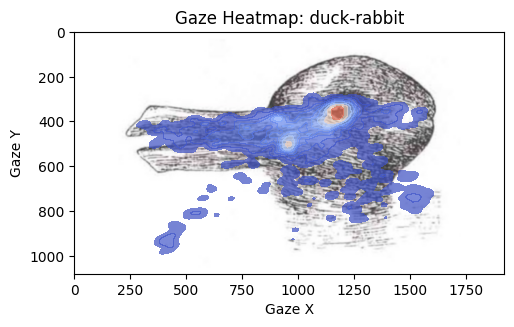


Skipping heatmap for stimulus 'duck-rabbi': Image not found.


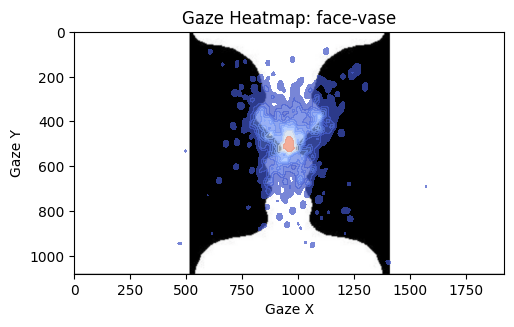


Skipping heatmap for stimulus 'face-vas': Image not found.


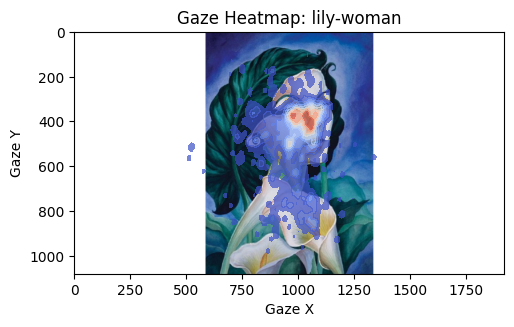


Skipping heatmap for stimulus 'lily-woma': Image not found.


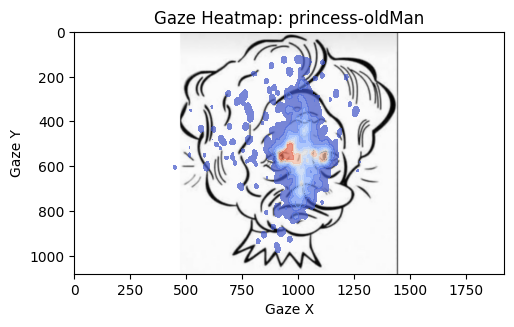


Skipping heatmap for stimulus 'princess-oldman': Image not found.


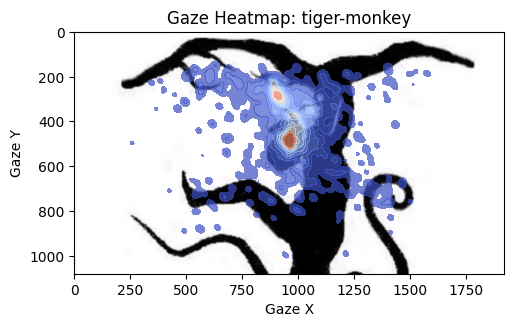


Skipping heatmap for stimulus 'tiger-monke': Image not found.


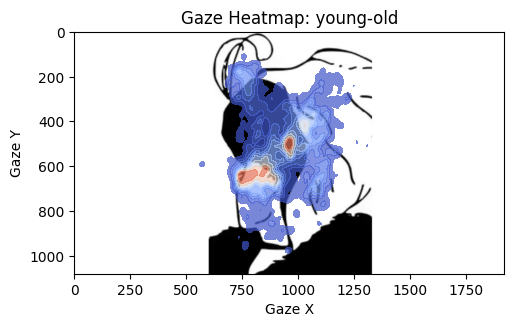


Skipping heatmap for stimulus 'young-oldd': Image not found.

Skipping heatmap for stimulus 'Instruction (2)': Image not found.


In [ ]:
# 3. Plot heatmaps for each stimulus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os

# Assuming a standard resolution if not provided in data or images
plot_width = 1920
plot_height = 1080

for stimulus in unique_stimuli:
    if stimulus in image_paths and os.path.exists(image_paths[stimulus]):
        image_path = image_paths[stimulus]
        background_img = mpimg.imread(image_path)

        # Calculate the aspect ratio based on the specified resolution for figure sizing
        aspect_ratio_resolution = plot_width / plot_height if plot_height != 0 else 1 # Avoid division by zero

        # Adjust the figure size based on the aspect ratio of the specified resolution
        total_width = 6 # Adjust total width for single plots
        figure_height = total_width / aspect_ratio_resolution

        plt.figure(figsize=(total_width, figure_height))

        # Filter data for the current stimulus and non-missing gaze points
        subset = df[
            (df['Presented Stimulus name'] == stimulus) &
            df['Gaze point X'].notna() &
            df['Gaze point Y'].notna()
        ]

        # Display the background image first, adjusting extent to match the specified resolution and top-left origin
        plt.imshow(background_img, extent=[0, plot_width, plot_height, 0])

        # Plot the heatmap with transparency using the original Y coordinates
        sns.kdeplot(
            data=subset,
            x='Gaze point X',
            y='Gaze point Y', # Use the original Y column
            fill=True,
            cmap='coolwarm',
            alpha=0.7,  # Add transparency to see background
            bw_adjust=0.5,
            thresh=0.05
        )

        plt.title(f"Gaze Heatmap: {stimulus}")
        plt.xlim(0, plot_width) # Set x-axis limits to match specified width
        plt.ylim(plot_height, 0) # Set y-axis limits to match specified height (inverted for top-left origin)
        plt.xlabel("Gaze X")
        plt.ylabel("Gaze Y") # Label reflects the original Y

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSkipping heatmap for stimulus '{stimulus}': Image not found.")

### Gaze Path


Skipping gaze path plot for stimulus 'nan': Image not found.

Skipping gaze path plot for stimulus 'Eyetracker Calibration': Image not found.

Skipping gaze path plot for stimulus 'Instruction (1)': Image not found.

Skipping gaze path plot for stimulus 'Plus Sign': Image not found.


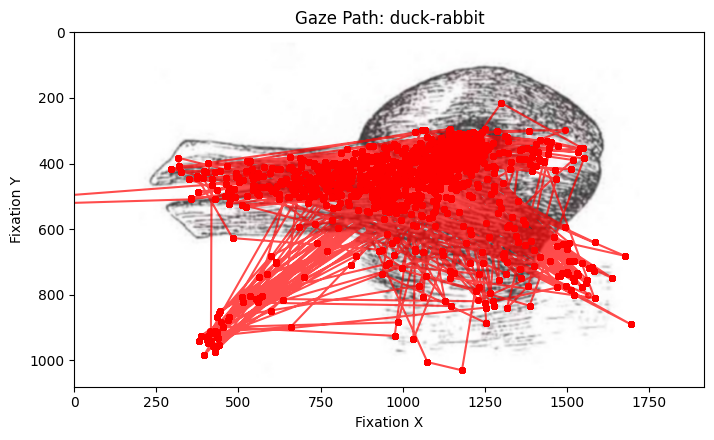


Skipping gaze path plot for stimulus 'duck-rabbi': Image not found.


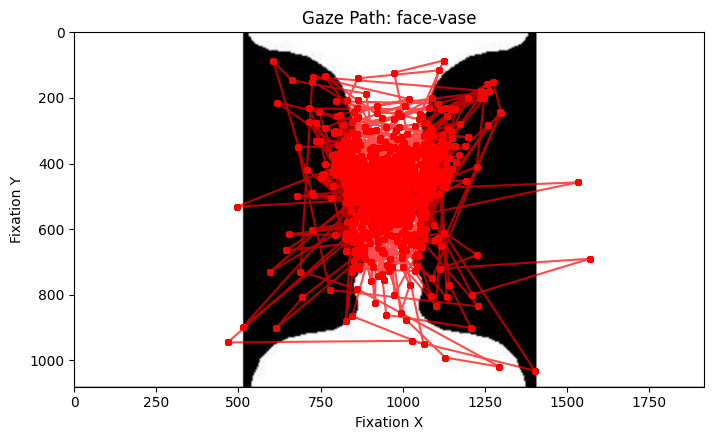


Skipping gaze path plot for stimulus 'face-vas': Image not found.


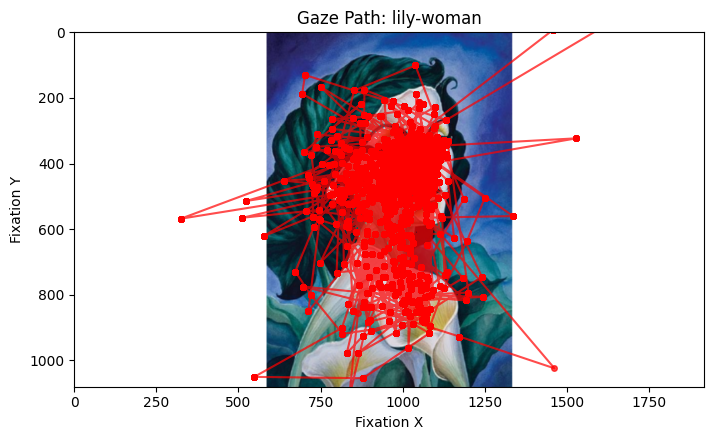


Skipping gaze path plot for stimulus 'lily-woma': Image not found.


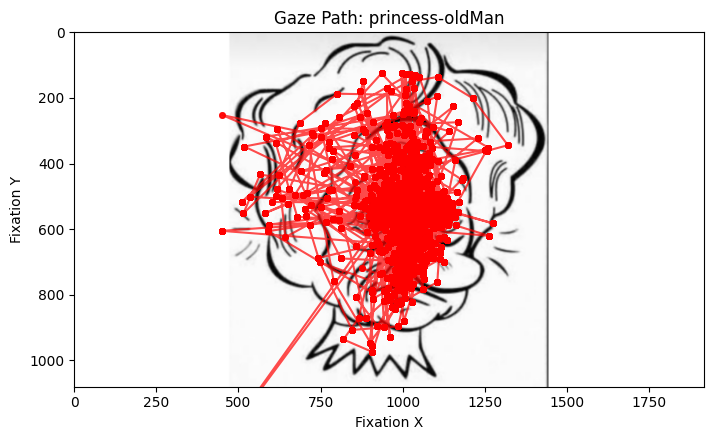


Skipping gaze path plot for stimulus 'princess-oldman': Image not found.


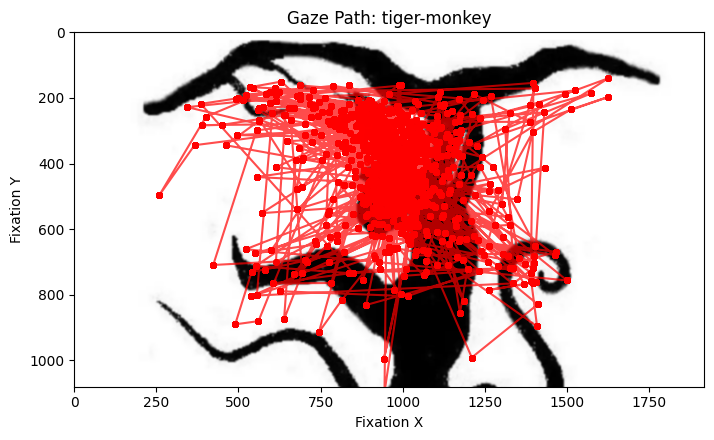


Skipping gaze path plot for stimulus 'tiger-monke': Image not found.


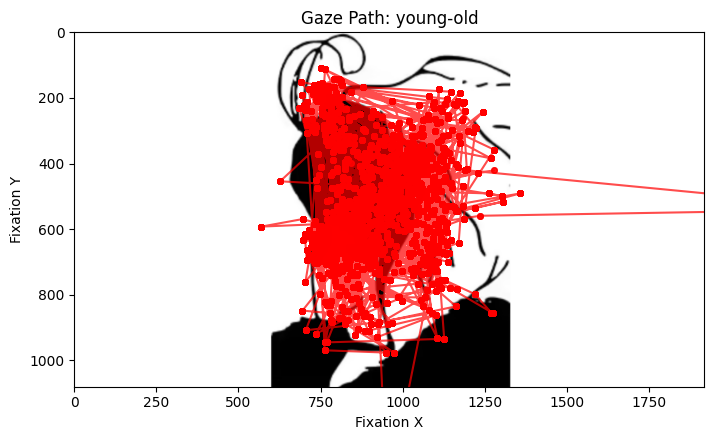


Skipping gaze path plot for stimulus 'young-oldd': Image not found.

Skipping gaze path plot for stimulus 'Instruction (2)': Image not found.


In [ ]:
# Plot gaze paths for each stimulus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Assuming the same standard resolution for plotting
plot_width = 1920
plot_height = 1080

for stimulus in unique_stimuli:
    if stimulus in image_paths and os.path.exists(image_paths[stimulus]):
        image_path = image_paths[stimulus]
        background_img = mpimg.imread(image_path)

        # Calculate the aspect ratio based on the specified resolution for figure sizing
        aspect_ratio_resolution = plot_width / plot_height if plot_height != 0 else 1 # Avoid division by zero

        # Adjust the figure size based on the aspect ratio of the specified resolution
        total_width = 8 # Adjust figure width for gaze path plots
        figure_height = total_width / aspect_ratio_resolution

        plt.figure(figsize=(total_width, figure_height))

        # Filter data for the current stimulus and get fixation points
        subset = df[(df['Presented Stimulus name'] == stimulus)]
        fixations = subset[subset['Eye movement type'] == 'Fixation'].dropna(subset=['Fixation point X', 'Fixation point Y'])


        # Display the background image first, adjusting extent to match the specified resolution and top-left origin
        plt.imshow(background_img, extent=[0, plot_width, plot_height, 0])

        # Plot the gaze path (sequence of fixations)
        plt.plot(
            fixations['Fixation point X'],
            fixations['Fixation point Y'],
            marker='o', # Mark fixation points
            linestyle='-', # Connect fixations with lines
            color='red', # You can choose a different color
            alpha=0.7, # Add transparency
            markersize=4 # Adjust marker size
        )

        plt.title(f"Gaze Path: {stimulus}")
        plt.xlim(0, plot_width) # Set x-axis limits to match specified width
        plt.ylim(plot_height, 0) # Set y-axis limits to match specified height (inverted for top-left origin)
        plt.xlabel("Fixation X")
        plt.ylabel("Fixation Y") # Label reflects the original Y

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSkipping gaze path plot for stimulus '{stimulus}': Image not found.")

## Gender-based Plots Analysis

Plots generated based on genders

### Gaze Heatmap


Skipping gender comparison heatmap for stimulus 'nan': Image not found.

Skipping gender comparison heatmap for stimulus 'Eyetracker Calibration': Image not found.

Skipping gender comparison heatmap for stimulus 'Instruction (1)': Image not found.

Skipping gender comparison heatmap for stimulus 'Plus Sign': Image not found.


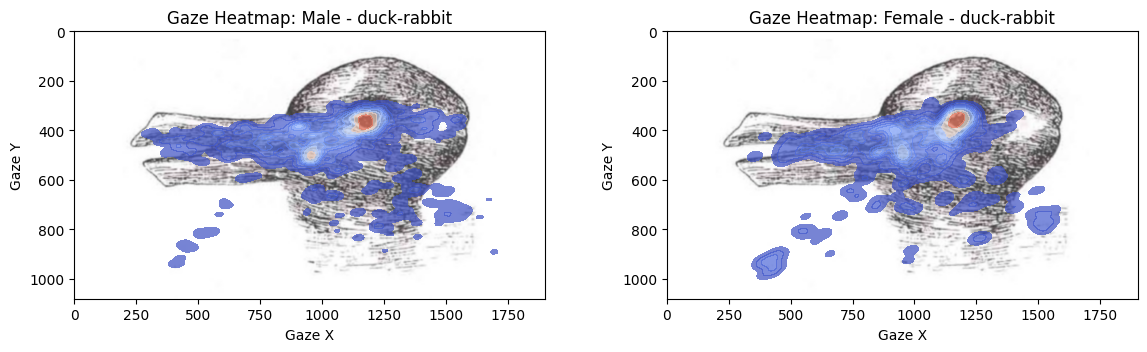


Skipping gender comparison heatmap for stimulus 'duck-rabbi': Image not found.


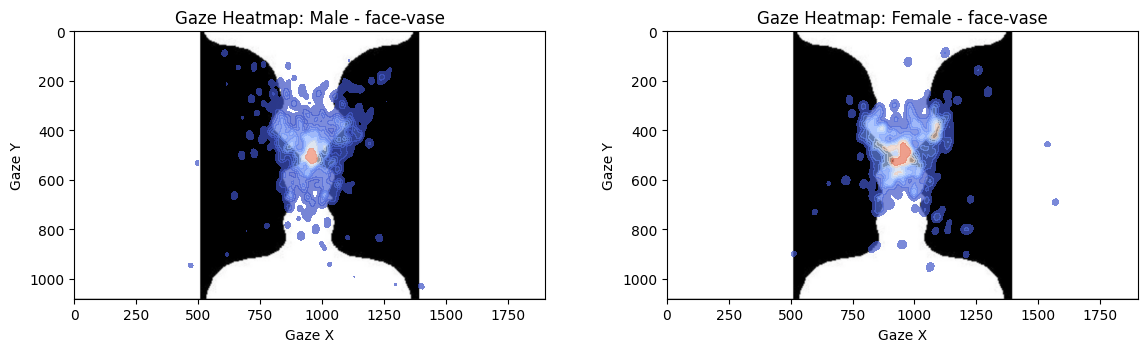


Skipping gender comparison heatmap for stimulus 'face-vas': Image not found.


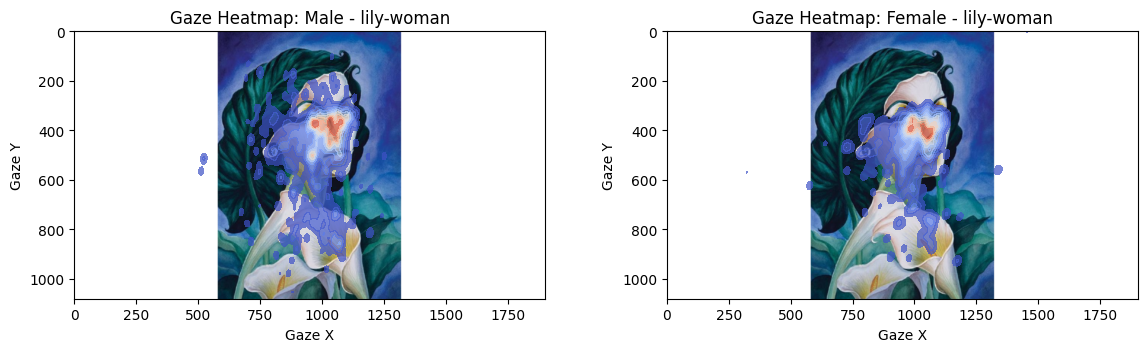


Skipping gender comparison heatmap for stimulus 'lily-woma': Image not found.


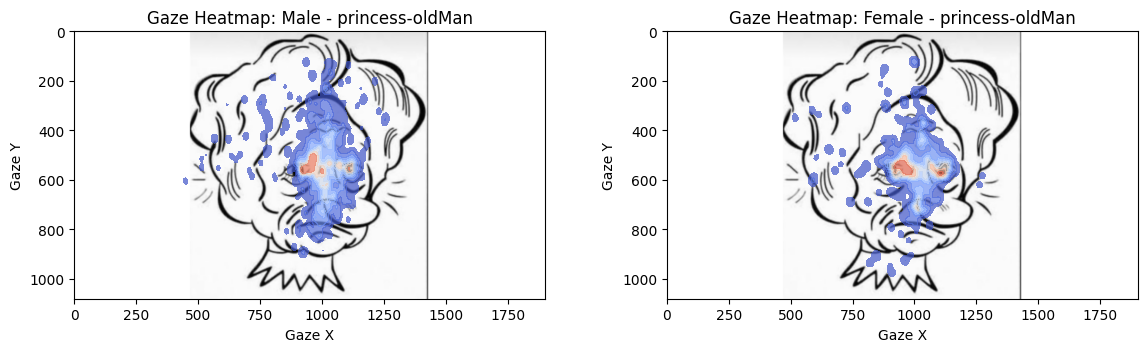


Skipping gender comparison heatmap for stimulus 'princess-oldman': Image not found.


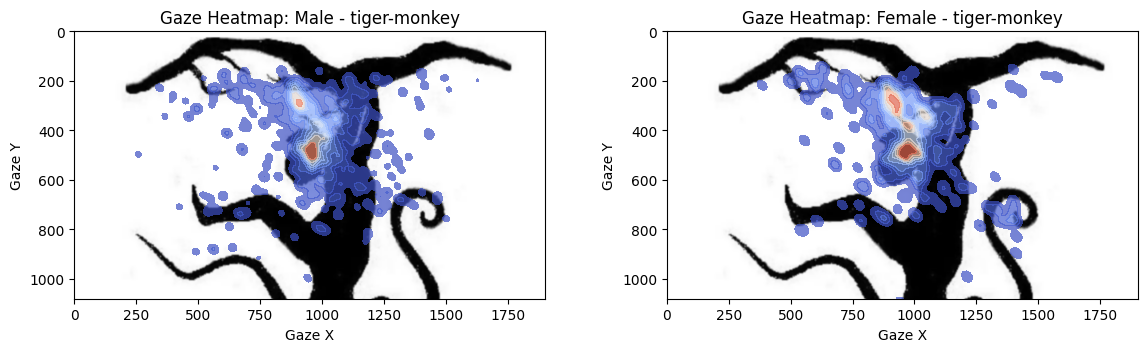


Skipping gender comparison heatmap for stimulus 'tiger-monke': Image not found.


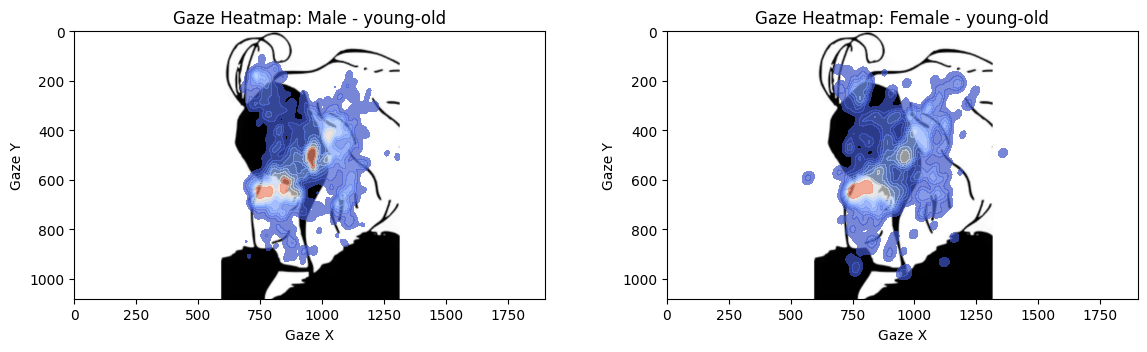


Skipping gender comparison heatmap for stimulus 'young-oldd': Image not found.

Skipping gender comparison heatmap for stimulus 'Instruction (2)': Image not found.


In [ ]:
# Analyze heatmaps by gender for each stimulus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os

# Assuming the same standard resolution for plotting
plot_width = 1920
plot_height = 1080

for stimulus in unique_stimuli:
    if stimulus in image_paths and os.path.exists(image_paths[stimulus]):
        image_path = image_paths[stimulus]
        background_img = mpimg.imread(image_path)

        # Calculate the aspect ratio based on the specified resolution for figure sizing
        aspect_ratio_resolution = plot_width / plot_height if plot_height != 0 else 1 # Avoid division by zero

        # Adjust the figure size based on the aspect ratio of the specified resolution
        total_width = 12 # Use a wider figure for side-by-side plots
        figure_height = total_width / (aspect_ratio_resolution * 2)  # Divide by 2 for two subplots

        plt.figure(figsize=(total_width, figure_height))

        for i, gender in enumerate(['male', 'female']):
            subset = df[
                (df['Presented Stimulus name'] == stimulus) &
                (df['Gender'] == gender) &
                df['Gaze point X'].notna() &
                df['Gaze point Y'].notna()
            ]

            plt.subplot(1, 2, i + 1)

            # Display the background image first, adjusting extent to match the specified resolution and top-left origin
            plt.imshow(background_img, extent=[0, plot_width, plot_height, 0])

            # Plot the heatmap with transparency using the original Y coordinates
            sns.kdeplot(
                data=subset,
                x='Gaze point X',
                y='Gaze point Y', # Use the original Y column
                fill=True,
                cmap='coolwarm',
                alpha=0.7,  # Add transparency to see background
                bw_adjust=0.5,
                thresh=0.05
            )

            plt.title(f"Gaze Heatmap: {gender.capitalize()} - {stimulus}")
            plt.xlim(0, plot_width) # Set x-axis limits to match specified width
            plt.ylim(plot_height, 0) # Set y-axis limits to match specified height (inverted for top-left origin)
            plt.xlabel("Gaze X")
            plt.ylabel("Gaze Y") # Label reflects the original Y

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSkipping gender comparison heatmap for stimulus '{stimulus}': Image not found.")

### Gaze Path


Skipping gender comparison gaze path plot for stimulus 'nan': Image not found.

Skipping gender comparison gaze path plot for stimulus 'Eyetracker Calibration': Image not found.

Skipping gender comparison gaze path plot for stimulus 'Instruction (1)': Image not found.

Skipping gender comparison gaze path plot for stimulus 'Plus Sign': Image not found.


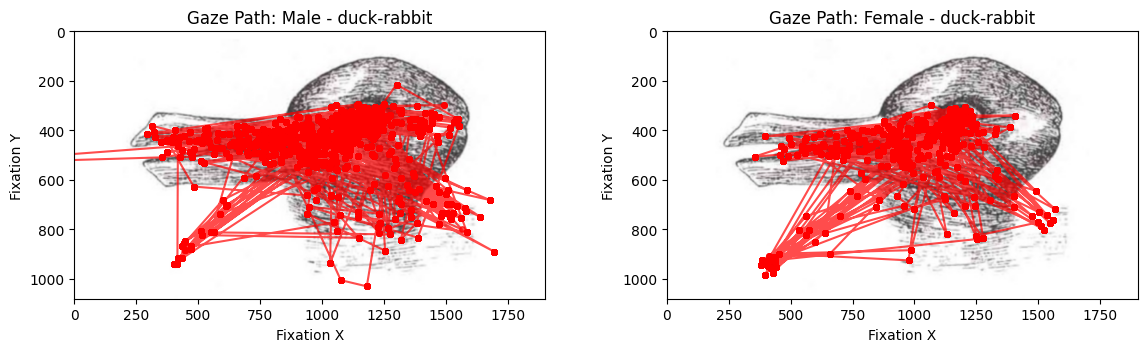


Skipping gender comparison gaze path plot for stimulus 'duck-rabbi': Image not found.


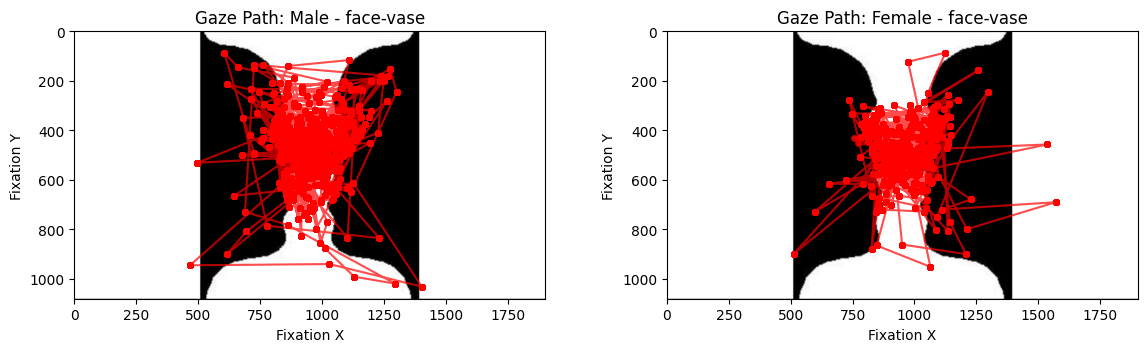


Skipping gender comparison gaze path plot for stimulus 'face-vas': Image not found.


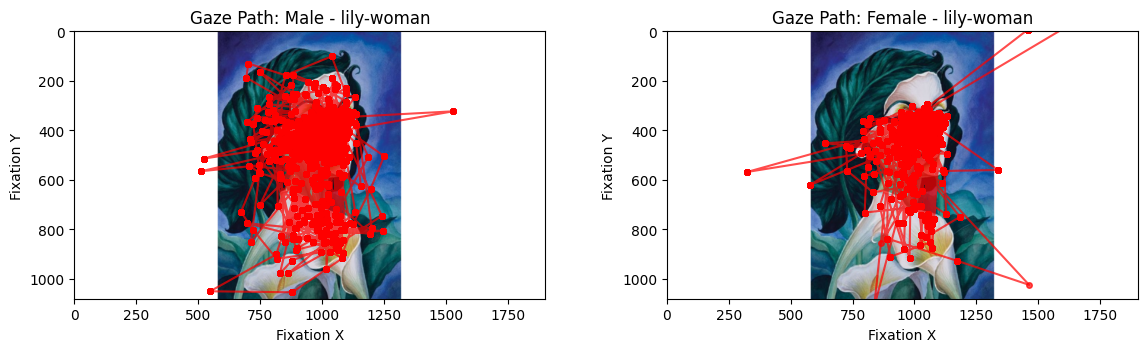


Skipping gender comparison gaze path plot for stimulus 'lily-woma': Image not found.


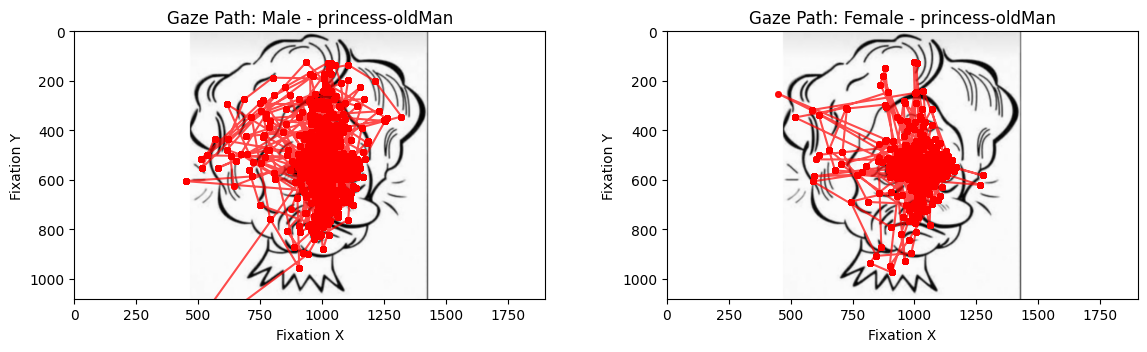


Skipping gender comparison gaze path plot for stimulus 'princess-oldman': Image not found.


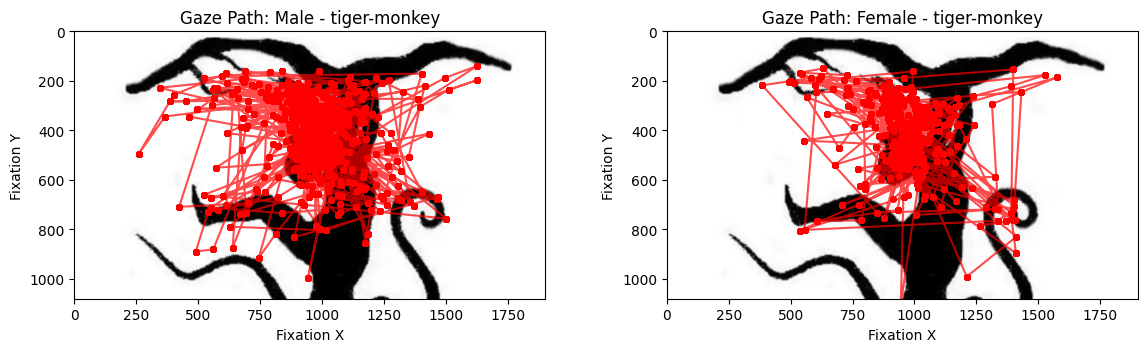


Skipping gender comparison gaze path plot for stimulus 'tiger-monke': Image not found.


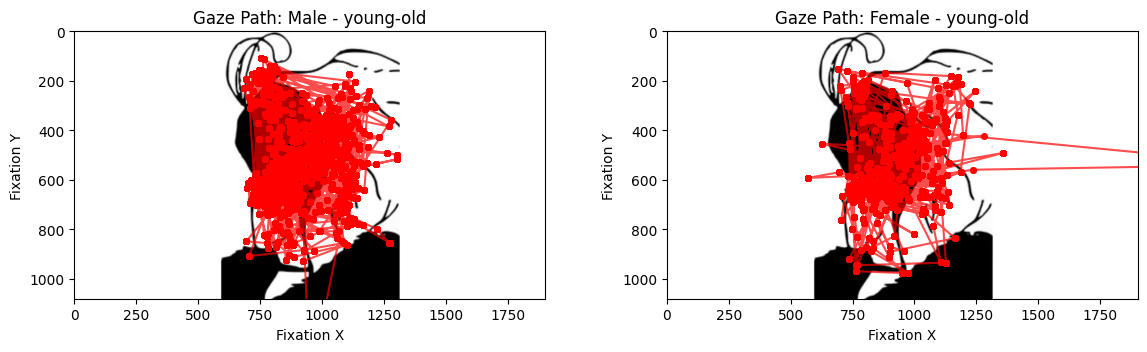


Skipping gender comparison gaze path plot for stimulus 'young-oldd': Image not found.

Skipping gender comparison gaze path plot for stimulus 'Instruction (2)': Image not found.


In [ ]:
# Plot gaze paths for each stimulus by gender
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Assuming the same standard resolution for plotting
plot_width = 1920
plot_height = 1080

for stimulus in unique_stimuli:
    if stimulus in image_paths and os.path.exists(image_paths[stimulus]):
        image_path = image_paths[stimulus]
        background_img = mpimg.imread(image_path)

        # Calculate the aspect ratio based on the specified resolution for figure sizing
        aspect_ratio_resolution = plot_width / plot_height if plot_height != 0 else 1 # Avoid division by zero

        # Adjust the figure size based on the aspect ratio of the specified resolution
        total_width = 12 # Use a wider figure for side-by-side plots
        figure_height = total_width / (aspect_ratio_resolution * 2)  # Divide by 2 for two subplots

        plt.figure(figsize=(total_width, figure_height))

        for i, gender in enumerate(['male', 'female']):
            # Filter data for the current stimulus and gender, and get fixation points
            subset = df[(df['Presented Stimulus name'] == stimulus) & (df['Gender'] == gender)]
            fixations = subset[subset['Eye movement type'] == 'Fixation'].dropna(subset=['Fixation point X', 'Fixation point Y'])

            plt.subplot(1, 2, i + 1)

            # Display the background image first, adjusting extent to match the specified resolution and top-left origin
            plt.imshow(background_img, extent=[0, plot_width, plot_height, 0])

            # Plot the gaze path (sequence of fixations)
            plt.plot(
                fixations['Fixation point X'],
                fixations['Fixation point Y'],
                marker='o', # Mark fixation points
                linestyle='-', # Connect fixations with lines
                color='red', # You can choose a different color
                alpha=0.7, # Add transparency
                markersize=4 # Adjust marker size
            )

            plt.title(f"Gaze Path: {gender.capitalize()} - {stimulus}")
            plt.xlim(0, plot_width) # Set x-axis limits to match specified width
            plt.ylim(plot_height, 0) # Set y-axis limits to match specified height (inverted for top-left origin)
            plt.xlabel("Fixation X")
            plt.ylabel("Fixation Y") # Label reflects the original Y

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSkipping gender comparison gaze path plot for stimulus '{stimulus}': Image not found.")

## Optical Illusions Analysis

In [ ]:
# Identify optical illusions from AOI columns
aoi_columns = [col for col in df_cleaned.columns if 'AOI hit' in col]
print(f"Found {len(aoi_columns)} AOI columns")

# Extract illusion types from AOI column names
illusion_types = set()
for col in aoi_columns:
    try:
        # Extract illusion name (text before first dash in AOI name)
        if '[' in col and ' - ' in col:
            illusion = col.split('[')[1].split(' - ')[0].strip()
            illusion_types.add(illusion)
    except:
        pass

print(f"\nIdentified {len(illusion_types)} optical illusions:")
for i, illusion in enumerate(sorted(illusion_types), 1):
    print(f"{i}. {illusion}")

# Count AOI regions per illusion
print("\nAOI regions per illusion:")
for illusion in sorted(illusion_types):
    related_cols = [col for col in aoi_columns if illusion.lower() in col.lower()]
    print(f"{illusion}: {len(related_cols)} regions")

Found 36 AOI columns

Identified 12 optical illusions:
1. duck-rabbi
2. duck-rabbit
3. face-vas
4. face-vase
5. lily-woma
6. lily-woman
7. princess-oldMan
8. princess-oldman
9. tiger-monke
10. tiger-monkey
11. young-old
12. young-oldd

AOI regions per illusion:
duck-rabbi: 6 regions
duck-rabbit: 4 regions
face-vas: 5 regions
face-vase: 3 regions
lily-woma: 10 regions
lily-woman: 8 regions
princess-oldMan: 4 regions
princess-oldman: 4 regions
tiger-monke: 5 regions
tiger-monkey: 3 regions
young-old: 6 regions
young-oldd: 2 regions


In [ ]:
# Function to analyze each illusion by gender
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def analyze_illusion_by_gender(df, illusion_name):
    """Analyze AOI hits for a specific illusion by gender"""

    # Find AOI columns for this illusion
    aoi_cols = [col for col in df.columns if 'AOI hit' in col and illusion_name.lower() in col.lower()]

    if not aoi_cols:
        print(f"No AOI data found for {illusion_name}")
        return None

    print(f"\n{'='*60}")
    print(f"ANALYSIS: {illusion_name.upper()} ILLUSION")
    print(f"{'='*60}")
    print(f"AOI regions analyzed: {len(aoi_cols)}")

    # Calculate hit percentages by gender
    results = {}
    genders = df['Gender'].unique()

    for gender in genders:
        gender_data = df[df['Gender'] == gender]
        total_observations = len(gender_data)

        if total_observations == 0:
            continue

        results[gender] = {}

        for col in aoi_cols:
            # Convert to numeric if needed
            if gender_data[col].dtype == 'object':
                gender_data = gender_data.copy()
                gender_data[col] = pd.to_numeric(gender_data[col], errors='coerce')

            hits = gender_data[col].sum()
            percentage = (hits / total_observations) * 100

            # Clean AOI name for display
            aoi_name = col.replace('AOI hit [', '').replace(']', '')
            results[gender][aoi_name] = percentage

    # Convert to DataFrame for analysis
    results_df = pd.DataFrame(results)

    if len(results_df.columns) >= 2:
        # Calculate differences between genders
        gender_cols = results_df.columns[:2]
        results_df['difference'] = abs(results_df[gender_cols[0]] - results_df[gender_cols[1]])

        # Show all differences
        all_diff = results_df.sort_values('difference', ascending=False)
        print(f"\nAll AOI differences between {gender_cols[0]} and {gender_cols[1]}:")
        print(all_diff.round(2))

        # Create visualization using a standard bar chart
        if len(all_diff) > 0:
            fig, ax = plt.subplots(figsize=(12, 8)) # Adjust figure size as needed

            all_diff[['male', 'female']].plot(kind='bar', ax=ax, color=['lightblue', 'lightpink']) # Assuming 'male' and 'female' are the gender columns

            ax.set_title(f'{illusion_name} - Gender Differences in AOI Attention', fontsize=14)
            ax.set_xlabel('AOI Region')
            ax.set_ylabel('AOI Hit Percentage')
            ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability
            ax.legend(title='Gender')

            # Add percentage labels above bars
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%')

            plt.tight_layout()
            plt.show()


        # Statistical testing
        print(f"\nStatistical significance testing:")
        significant_aois = []

        for aoi in results_df.index:
            # Get data for each gender
            gender_groups = []
            for gender in gender_cols:
                gender_data = df[df['Gender'] == gender]
                aoi_col = [col for col in aoi_cols if aoi in col.replace('AOI hit [', '').replace(']', '')]
                if aoi_col:
                    # Ensure the column exists before trying to access it
                    if aoi_col[0] in gender_data.columns:
                         gender_groups.append(gender_data[aoi_col[0]].dropna())
                    else:
                         print(f"Warning: Column {aoi_col[0]} not found in gender data.")


            if len(gender_groups) == 2 and all(len(group) > 10 for group in gender_groups):
                # Ensure data types are numeric for t-test
                try:
                    group1_numeric = pd.to_numeric(gender_groups[0], errors='coerce').dropna()
                    group2_numeric = pd.to_numeric(gender_groups[1], errors='coerce').dropna()

                    if len(group1_numeric) > 1 and len(group2_numeric) > 1: # Ensure there's enough data for t-test after coercion and dropna
                         t_stat, p_value = stats.ttest_ind(group1_numeric, group2_numeric)
                         if p_value < 0.05:
                             significant_aois.append((aoi, p_value))
                    else:
                         print(f"Skipping t-test for {aoi} due to insufficient numeric data after coercion.")

                except Exception as e:
                    print(f"Error during t-test for {aoi}: {e}")
                    pass # Continue to the next AOI if there's an error


        if significant_aois:
            print(f"Found {len(significant_aois)} AOIs with significant gender differences (p < 0.05):")
            for aoi, p_val in significant_aois:
                print(f"  - {aoi}: p = {p_val}")
        else:
            print("No statistically significant gender differences found.")

    return results_df

print("Function defined successfully!")

Function defined successfully!


Starting analysis of all optical illusions...


ANALYSIS: DUCK-RABBI ILLUSION
AOI regions analyzed: 6

All AOI differences between male and female:
                                            male  female  difference
duck-rabbi - RABBIT                         0.90    0.40        0.51
duck-rabbit - Duck and Rabbit face outline  3.56    3.29        0.27
duck-rabbit - Duck and Rabbit eye           1.28    1.09        0.19
duck-rabbit - Beak and Ears                 0.97    1.04        0.07
duck-rabbi - DUCK                           1.56    1.53        0.03
duck-rabbit - Rabbits Mouth                 0.01    0.00        0.01


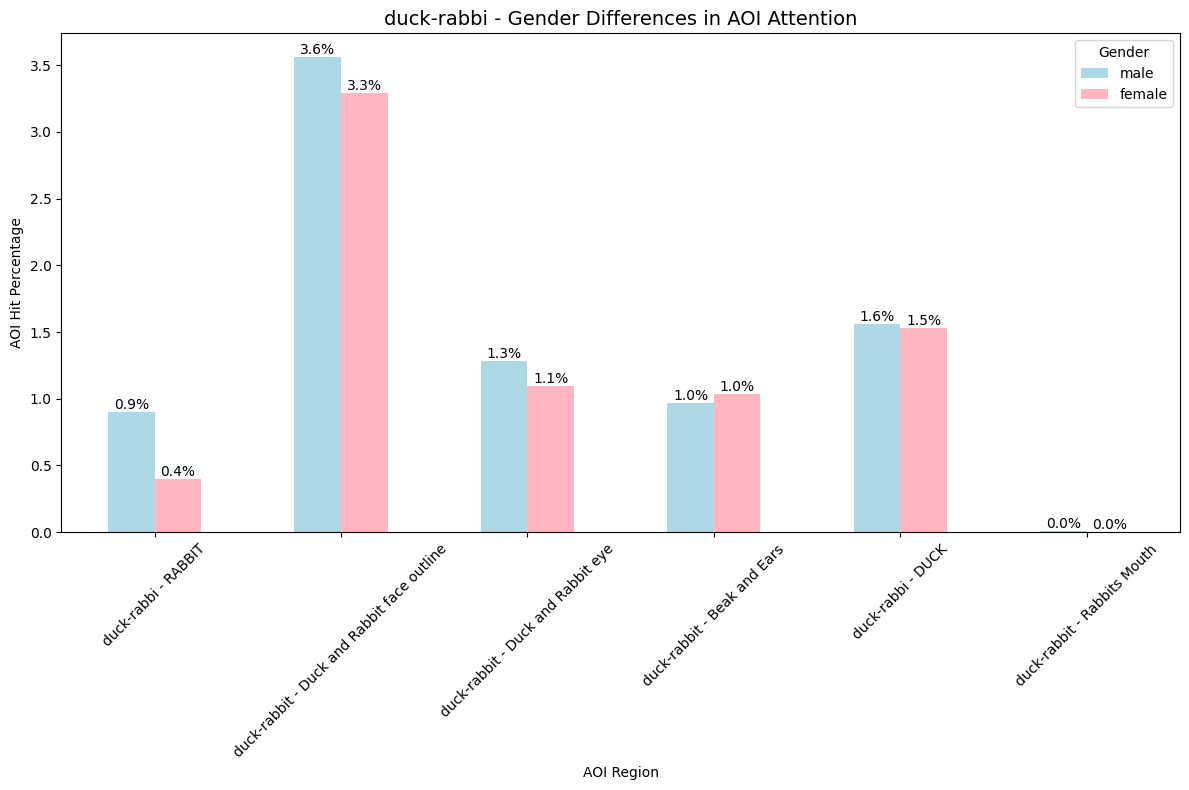


Statistical significance testing:
Found 6 AOIs with significant gender differences (p < 0.05):
  - duck-rabbit - Beak and Ears: p = 1.3371618193506746e-08
  - duck-rabbit - Duck and Rabbit eye: p = 4.194837971212192e-18
  - duck-rabbit - Duck and Rabbit face outline: p = 4.1228316363873596e-30
  - duck-rabbit - Rabbits Mouth: p = 1.427563639686652e-08
  - duck-rabbi - DUCK: p = 5.866165577929124e-41
  - duck-rabbi - RABBIT: p = 3.356117417100593e-167

ANALYSIS: DUCK-RABBIT ILLUSION
AOI regions analyzed: 4

All AOI differences between male and female:
                                            male  female  difference
duck-rabbit - Duck and Rabbit face outline  3.56    3.29        0.27
duck-rabbit - Duck and Rabbit eye           1.28    1.09        0.19
duck-rabbit - Beak and Ears                 0.97    1.04        0.07
duck-rabbit - Rabbits Mouth                 0.01    0.00        0.01


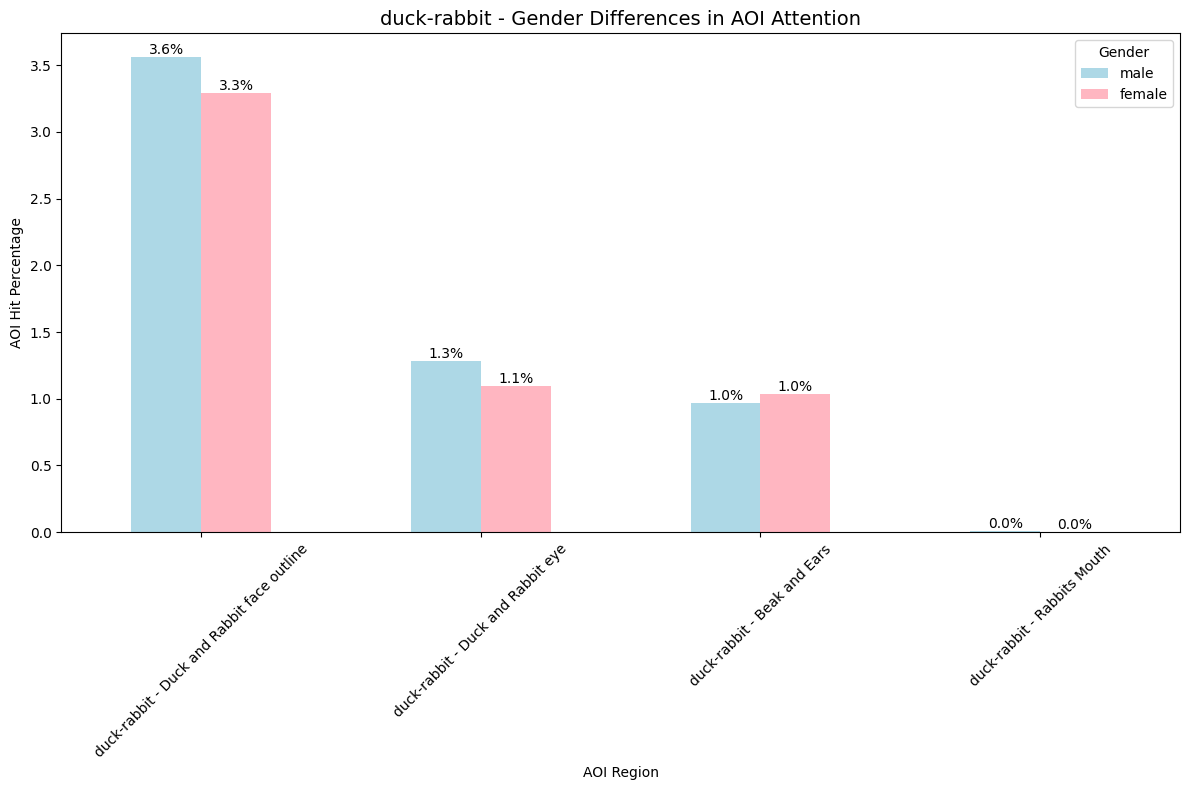


Statistical significance testing:
Found 4 AOIs with significant gender differences (p < 0.05):
  - duck-rabbit - Beak and Ears: p = 1.3371618193506746e-08
  - duck-rabbit - Duck and Rabbit eye: p = 4.194837971212192e-18
  - duck-rabbit - Duck and Rabbit face outline: p = 4.1228316363873596e-30
  - duck-rabbit - Rabbits Mouth: p = 1.427563639686652e-08

ANALYSIS: FACE-VAS ILLUSION
AOI regions analyzed: 5

All AOI differences between male and female:
                        male  female  difference
face-vase - Vase        2.66    2.37        0.29
face-vase - Left Face   0.53    0.66        0.13
face-vase - Right Face  0.56    0.61        0.05
face-vas - FACE         0.72    0.67        0.05
face-vas - VASE         0.41    0.40        0.01


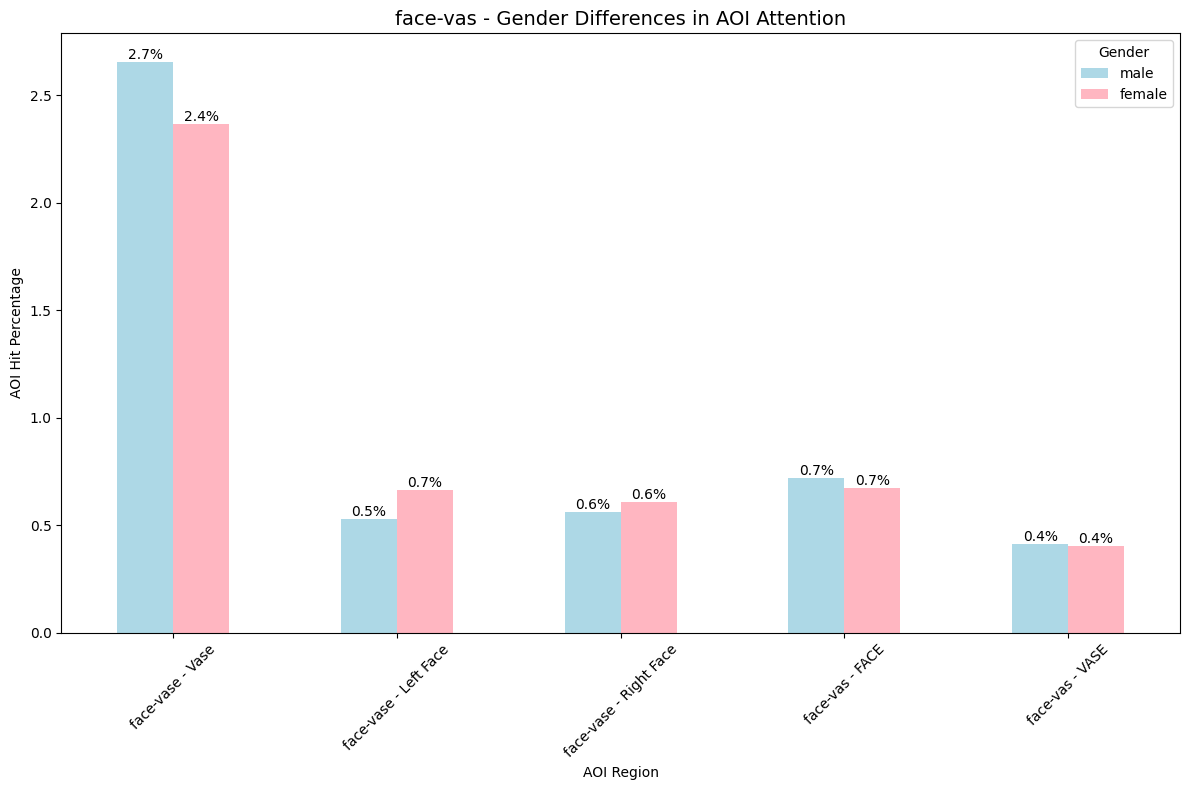


Statistical significance testing:
Found 3 AOIs with significant gender differences (p < 0.05):
  - face-vase - Left Face: p = 1.0268376899443319e-26
  - face-vase - Right Face: p = 7.259886165501756e-06
  - face-vase - Vase: p = 2.2389539544180632e-32

ANALYSIS: FACE-VASE ILLUSION
AOI regions analyzed: 3

All AOI differences between male and female:
                        male  female  difference
face-vase - Vase        2.66    2.37        0.29
face-vase - Left Face   0.53    0.66        0.13
face-vase - Right Face  0.56    0.61        0.05


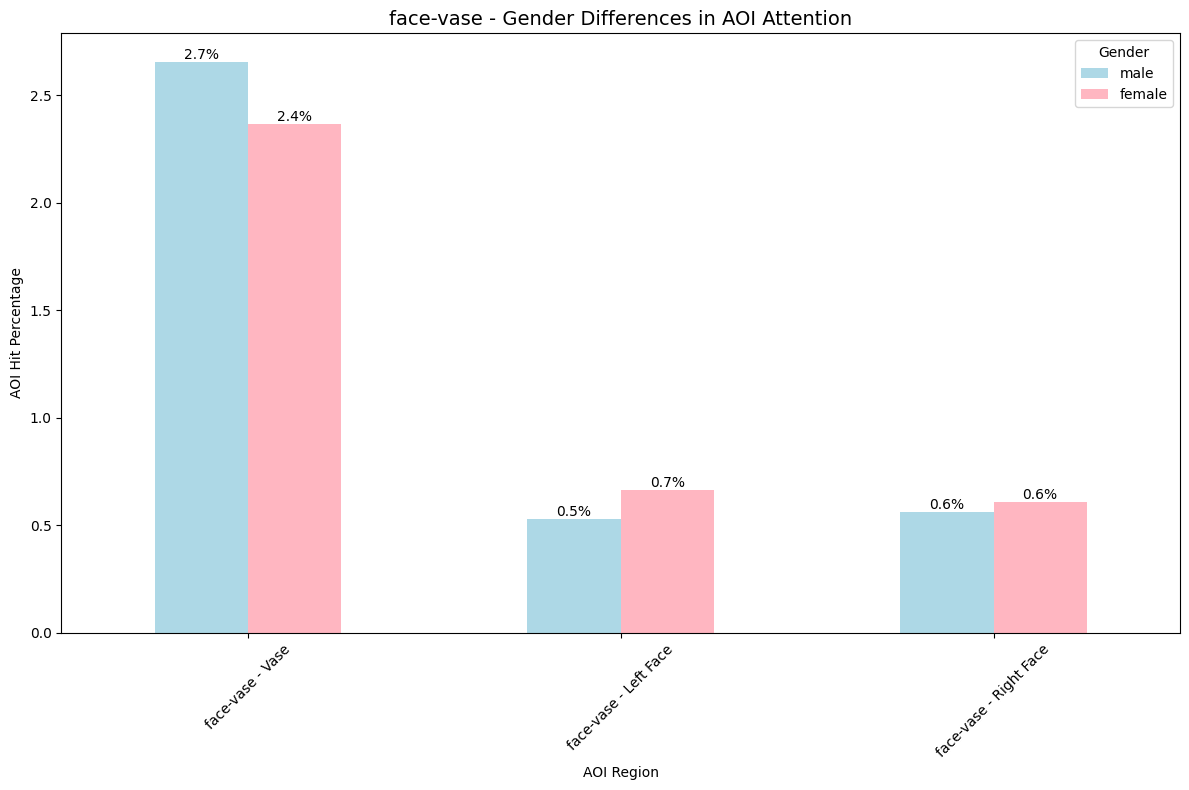


Statistical significance testing:
Found 3 AOIs with significant gender differences (p < 0.05):
  - face-vase - Left Face: p = 1.0268376899443319e-26
  - face-vase - Right Face: p = 7.259886165501756e-06
  - face-vase - Vase: p = 2.2389539544180632e-32

ANALYSIS: LILY-WOMA ILLUSION
AOI regions analyzed: 10

All AOI differences between male and female:
                           male  female  difference
lily-woma - WOMAN          0.79    0.64        0.15
lily-woman - Lower Lily    0.32    0.21        0.12
lily-woman - Central Lily  1.44    1.53        0.08
lily-woman - Nose          0.38    0.46        0.08
lily-woman - Hair          0.17    0.12        0.05
lily-woman - Right Eye     0.10    0.05        0.05
lily-woma - LILY           0.30    0.34        0.04
lily-woman - Left Eye      0.12    0.09        0.03
lily-woman - Mouth         0.09    0.11        0.02
lily-woman - Woman Face    3.17    3.16        0.01


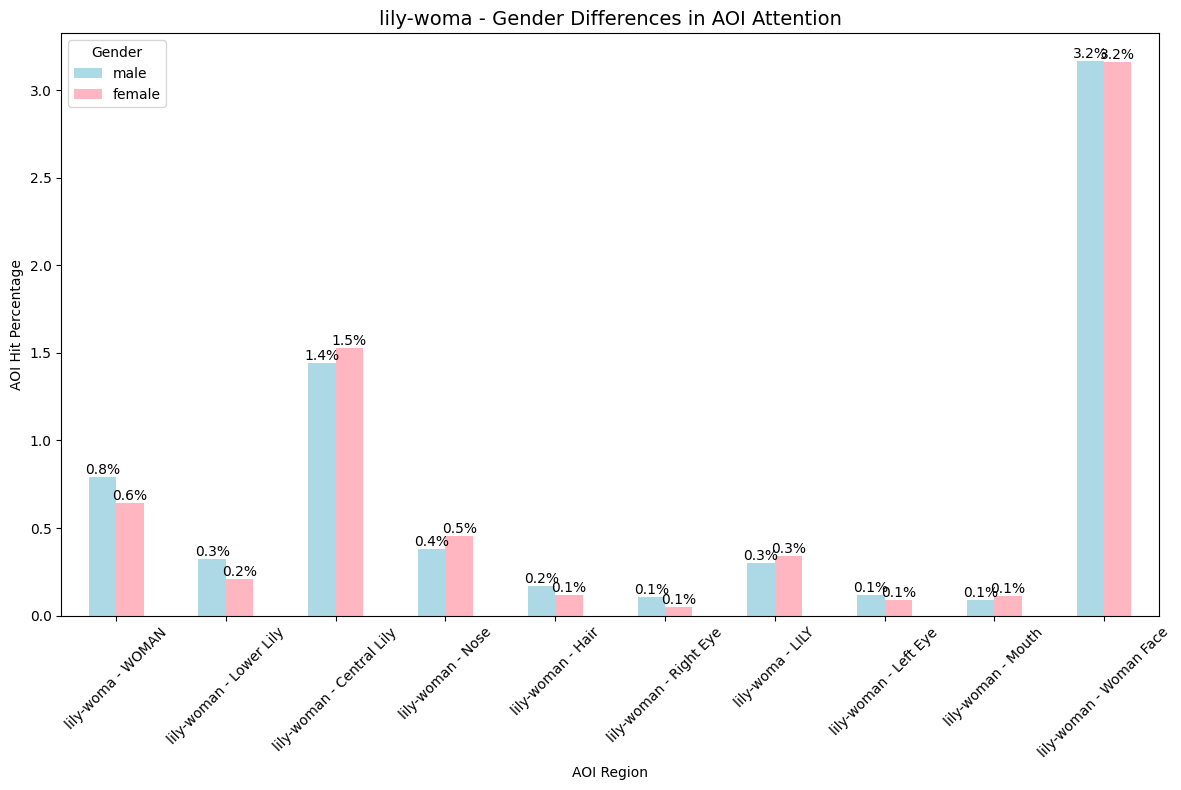


Statistical significance testing:
Found 10 AOIs with significant gender differences (p < 0.05):
  - lily-woman - Central Lily: p = 2.7725385200133457e-11
  - lily-woman - Hair: p = 1.2002830971448343e-10
  - lily-woman - Left Eye: p = 0.0004059268502187849
  - lily-woman - Lower Lily: p = 8.246222242587274e-26
  - lily-woman - Mouth: p = 9.943961806589768e-05
  - lily-woman - Nose: p = 6.85996704780918e-14
  - lily-woman - Right Eye: p = 1.3761374293076323e-17
  - lily-woman - Woman Face: p = 8.022901450532442e-08
  - lily-woma - LILY: p = 5.4589031221571424e-17
  - lily-woma - WOMAN: p = 1.068892695581255e-05

ANALYSIS: LILY-WOMAN ILLUSION
AOI regions analyzed: 8

All AOI differences between male and female:
                           male  female  difference
lily-woman - Lower Lily    0.32    0.21        0.12
lily-woman - Central Lily  1.44    1.53        0.08
lily-woman - Nose          0.38    0.46        0.08
lily-woman - Hair          0.17    0.12        0.05
lily-woman - Right E

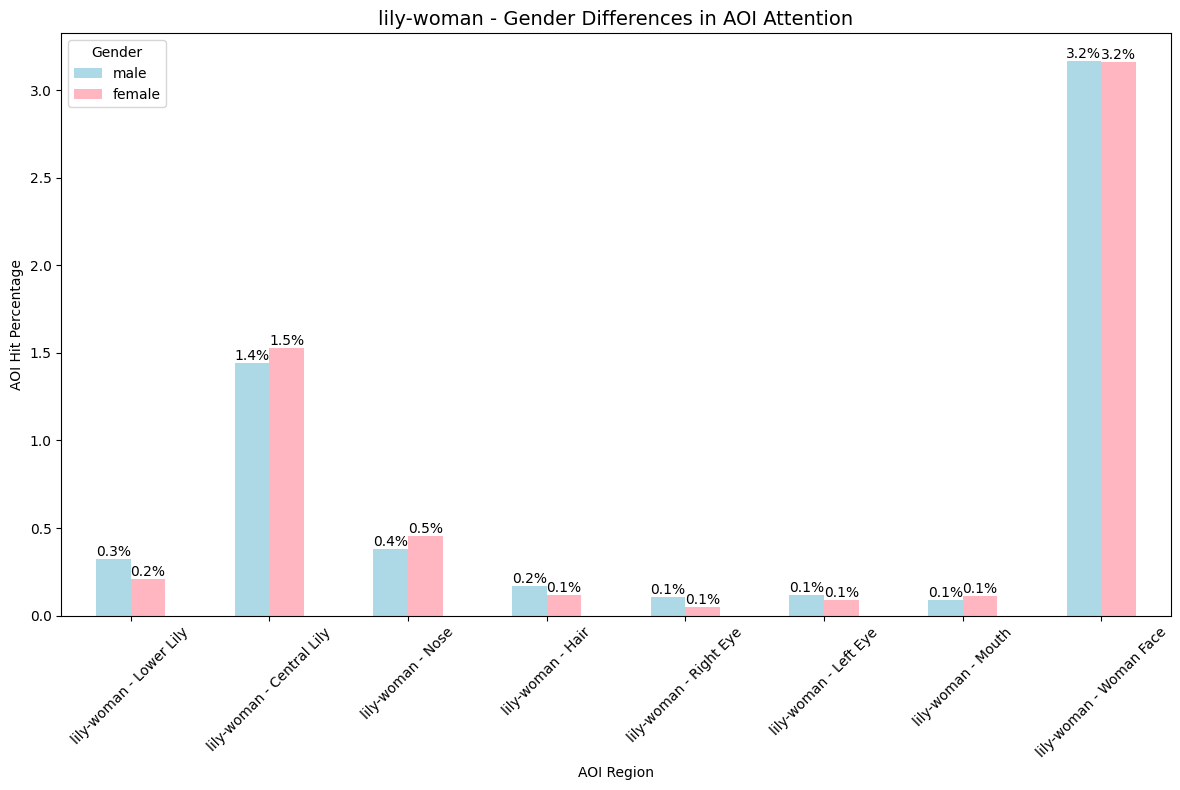


Statistical significance testing:
Found 8 AOIs with significant gender differences (p < 0.05):
  - lily-woman - Central Lily: p = 2.7725385200133457e-11
  - lily-woman - Hair: p = 1.2002830971448343e-10
  - lily-woman - Left Eye: p = 0.0004059268502187849
  - lily-woman - Lower Lily: p = 8.246222242587274e-26
  - lily-woman - Mouth: p = 9.943961806589768e-05
  - lily-woman - Nose: p = 6.85996704780918e-14
  - lily-woman - Right Eye: p = 1.3761374293076323e-17
  - lily-woman - Woman Face: p = 8.022901450532442e-08

ANALYSIS: PRINCESS-OLDMAN ILLUSION
AOI regions analyzed: 4

All AOI differences between male and female:
                               male  female  difference
princess-oldMan - Young Woman  2.07    1.85        0.21
princess-oldMan - Old Woman    1.61    1.68        0.07
princess-oldman - OLDMAN       0.65    0.58        0.06
princess-oldman - PRINCESS     0.41    0.47        0.06


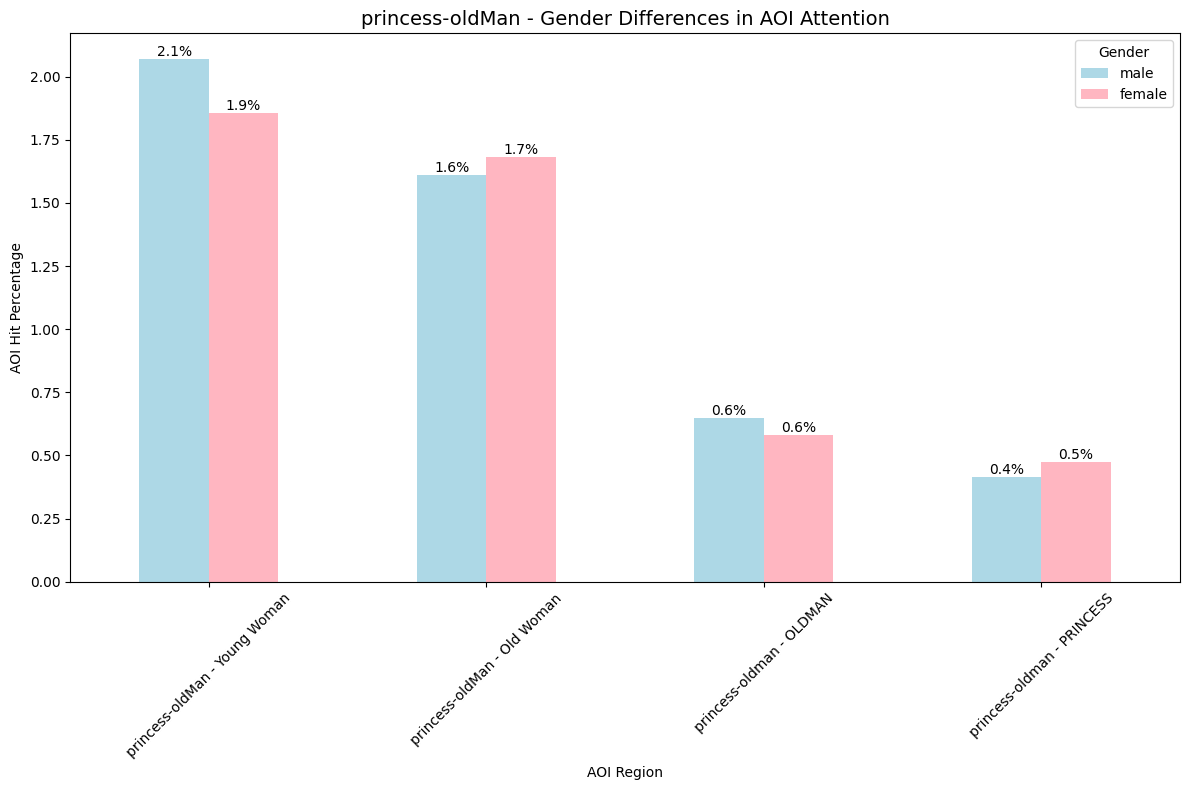


Statistical significance testing:
Found 4 AOIs with significant gender differences (p < 0.05):
  - princess-oldMan - Old Woman: p = 2.20127134477379e-10
  - princess-oldMan - Young Woman: p = 7.959903191023816e-14
  - princess-oldman - PRINCESS: p = 1.576630443923998e-10
  - princess-oldman - OLDMAN: p = 3.279581180844554e-05

ANALYSIS: PRINCESS-OLDMAN ILLUSION
AOI regions analyzed: 4

All AOI differences between male and female:
                               male  female  difference
princess-oldMan - Young Woman  2.07    1.85        0.21
princess-oldMan - Old Woman    1.61    1.68        0.07
princess-oldman - OLDMAN       0.65    0.58        0.06
princess-oldman - PRINCESS     0.41    0.47        0.06


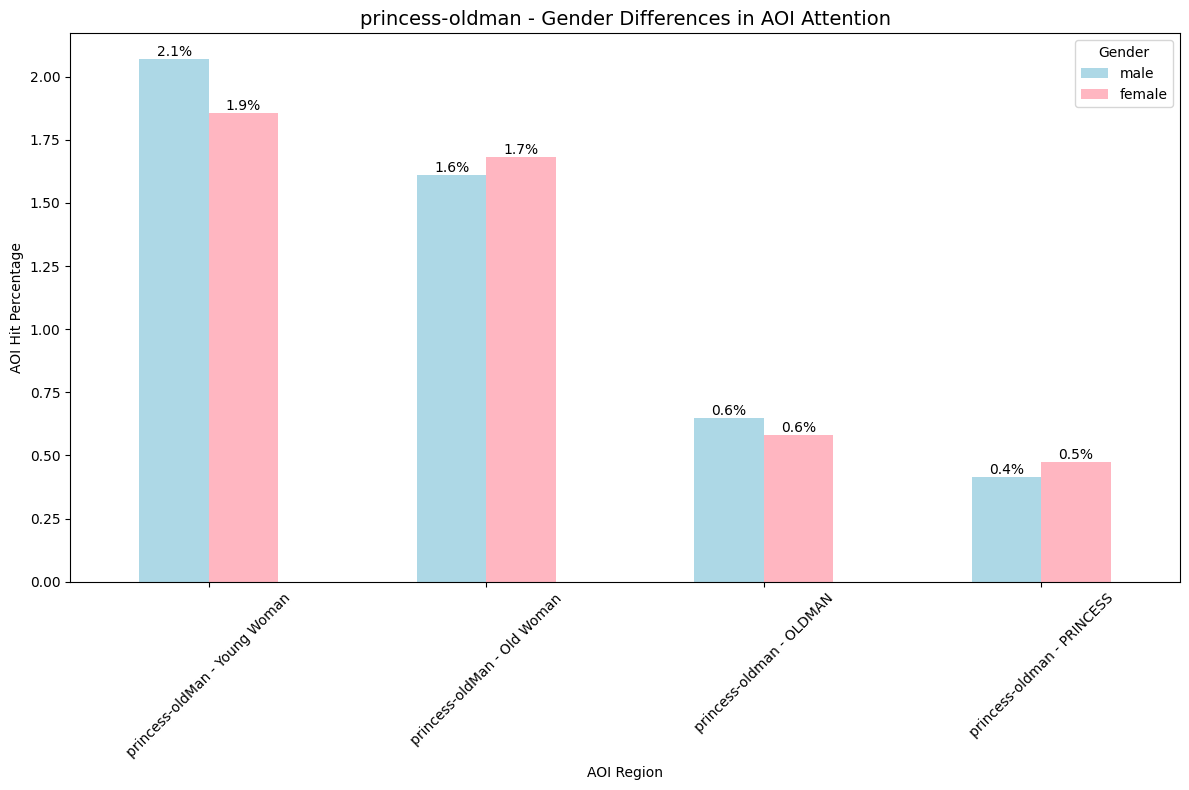


Statistical significance testing:
Found 4 AOIs with significant gender differences (p < 0.05):
  - princess-oldMan - Old Woman: p = 2.20127134477379e-10
  - princess-oldMan - Young Woman: p = 7.959903191023816e-14
  - princess-oldman - PRINCESS: p = 1.576630443923998e-10
  - princess-oldman - OLDMAN: p = 3.279581180844554e-05

ANALYSIS: TIGER-MONKE ILLUSION
AOI regions analyzed: 5

All AOI differences between male and female:
                            male  female  difference
tiger-monkey - Monkey       2.03    1.75        0.28
tiger-monkey - Tiger        1.62    1.67        0.06
tiger-monke - MONKEY        0.52    0.48        0.04
tiger-monkey - Monkey Tail  0.02    0.04        0.02
tiger-monke - TIGER         0.47    0.49        0.02


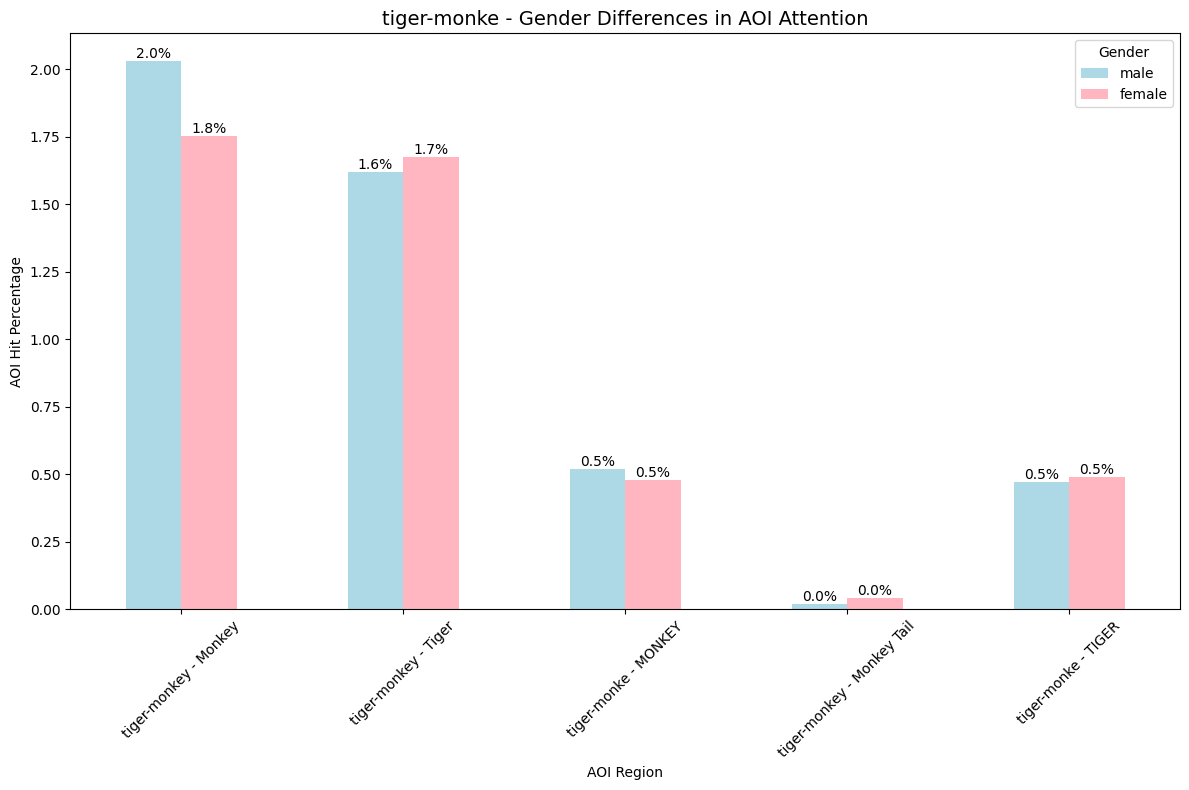


Statistical significance testing:
Found 5 AOIs with significant gender differences (p < 0.05):
  - tiger-monkey - Monkey: p = 6.178916649554459e-30
  - tiger-monkey - Monkey Tail: p = 8.352200559223806e-12
  - tiger-monkey - Tiger: p = 3.933568455627705e-07
  - tiger-monke - TIGER: p = 0.021092230100065158
  - tiger-monke - MONKEY: p = 0.006798556615541987

ANALYSIS: TIGER-MONKEY ILLUSION
AOI regions analyzed: 3

All AOI differences between male and female:
                            male  female  difference
tiger-monkey - Monkey       2.03    1.75        0.28
tiger-monkey - Tiger        1.62    1.67        0.06
tiger-monkey - Monkey Tail  0.02    0.04        0.02


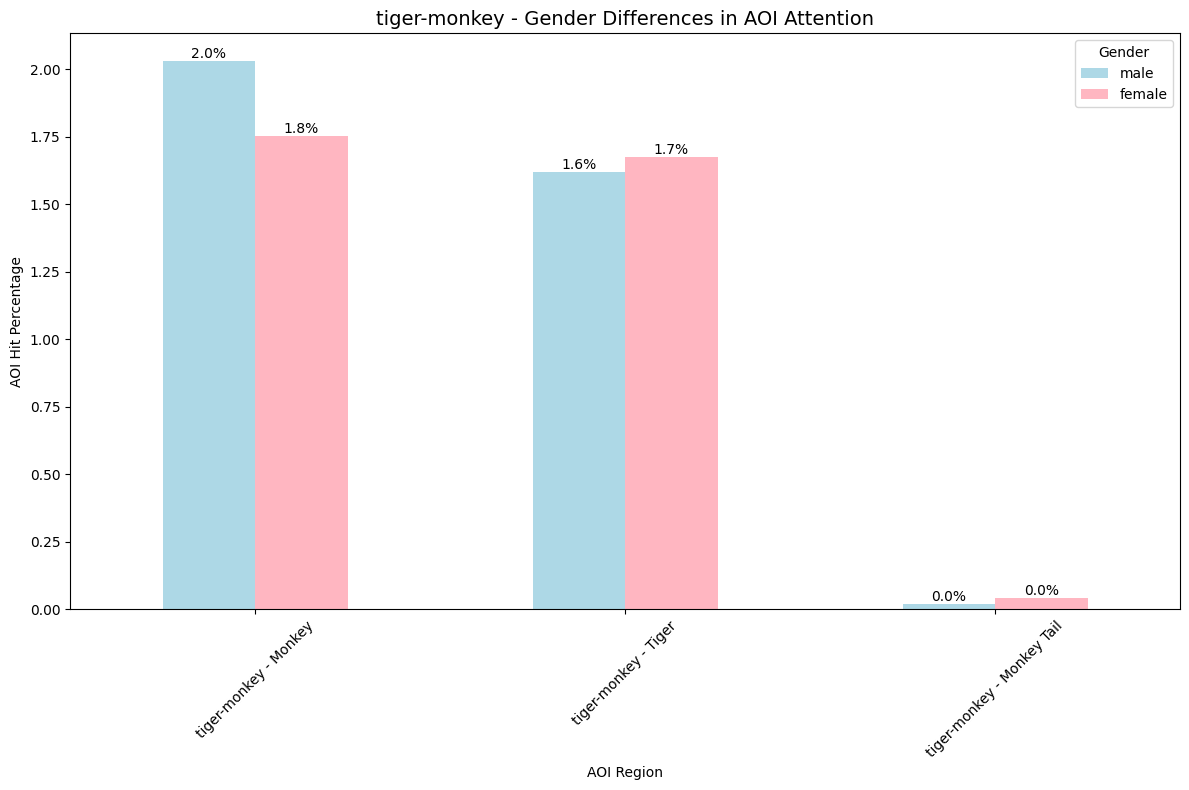


Statistical significance testing:
Found 3 AOIs with significant gender differences (p < 0.05):
  - tiger-monkey - Monkey: p = 6.178916649554459e-30
  - tiger-monkey - Monkey Tail: p = 8.352200559223806e-12
  - tiger-monkey - Tiger: p = 3.933568455627705e-07

ANALYSIS: YOUNG-OLD ILLUSION
AOI regions analyzed: 6

All AOI differences between male and female:
                            male  female  difference
young-old - Old Woman       1.05    0.85        0.20
young-oldd - YOUNG          0.80    0.73        0.07
young-oldd - OLD            0.22    0.25        0.03
young-old - Old Woman Eyes  0.42    0.44        0.02
young-old - Young Woman     2.58    2.58        0.01
young-old - Old Woman Nose  0.03    0.02        0.00


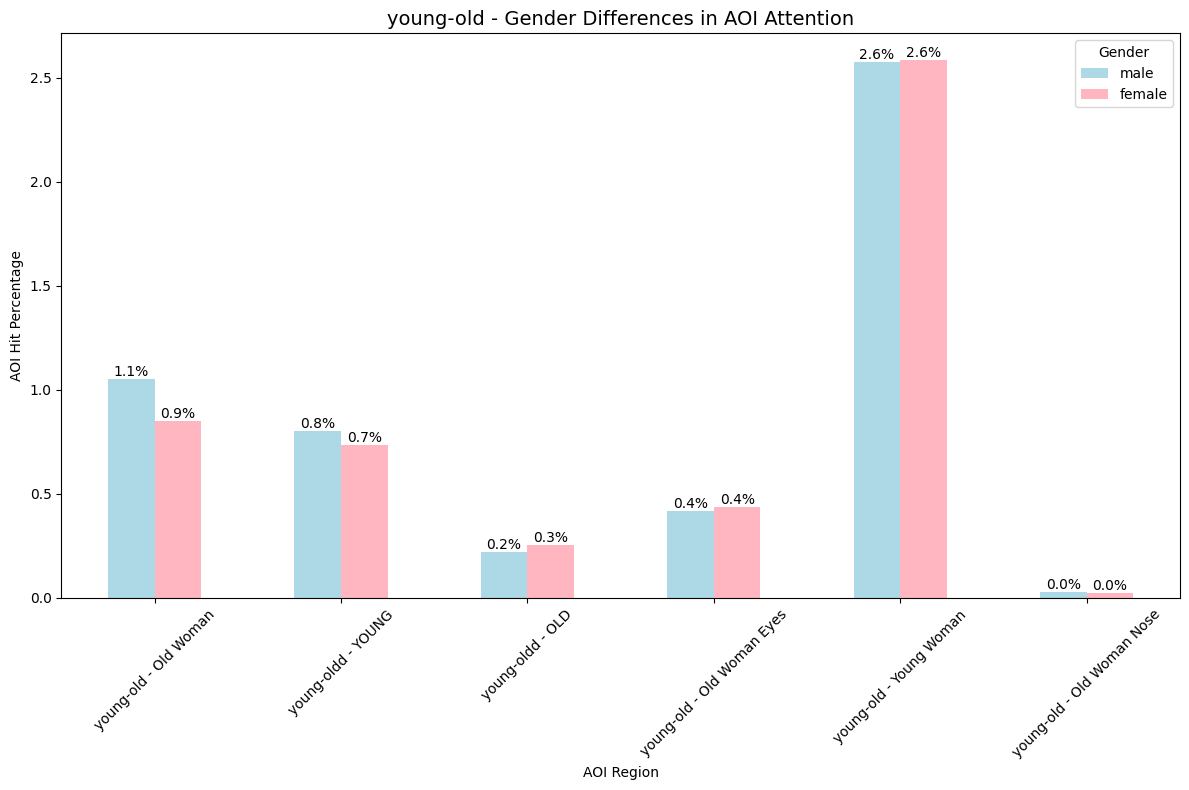


Statistical significance testing:
Found 5 AOIs with significant gender differences (p < 0.05):
  - young-old - Old Woman: p = 5.185972282637198e-22
  - young-old - Old Woman Eyes: p = 0.0023290374642815086
  - young-oldd - YOUNG: p = 0.0011202230858689472
  - young-oldd - OLD: p = 2.062109989488299e-06
  - young-old - Young Woman: p = 7.621590599680068e-08

ANALYSIS: YOUNG-OLDD ILLUSION
AOI regions analyzed: 2

All AOI differences between male and female:
                    male  female  difference
young-oldd - YOUNG  0.80    0.73        0.07
young-oldd - OLD    0.22    0.25        0.03


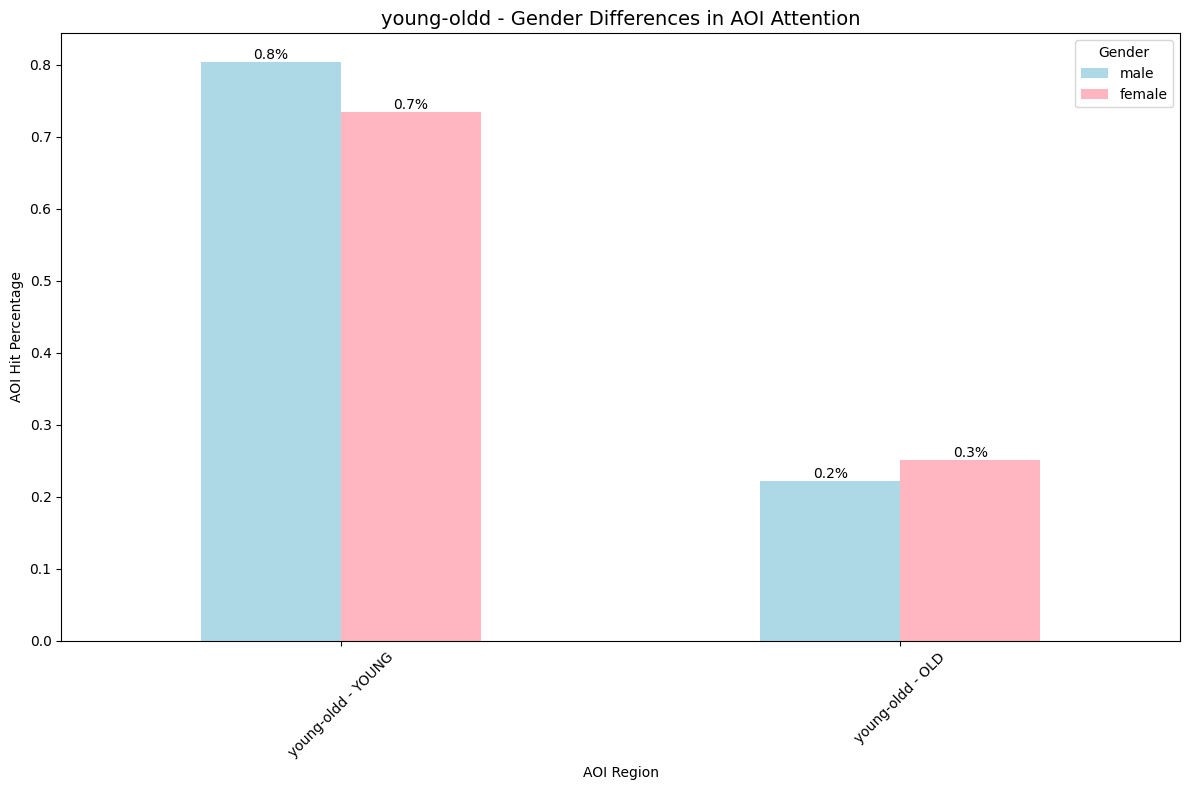


Statistical significance testing:
Found 2 AOIs with significant gender differences (p < 0.05):
  - young-oldd - YOUNG: p = 0.0011202230858689472
  - young-oldd - OLD: p = 2.062109989488299e-06


Completed analysis of 12 illusions.


In [ ]:
# Analyze each illusion
print("Starting analysis of all optical illusions...\n")

illusion_results = {}
for illusion in sorted(illusion_types):
    result = analyze_illusion_by_gender(df_cleaned, illusion)
    if result is not None:
        illusion_results[illusion] = result

print(f"\n\nCompleted analysis of {len(illusion_results)} illusions.")

Comment:

Across all twelve illusions analyzed, multiple Areas of Interest (AOIs) demonstrated statistically significant gender differences in visual attention, as determined by independent two-sample t-tests with significance set at p < 0.05. These results provide strong empirical support for the alternative hypothesis (H₁) and justify the rejection of the null hypothesis (H₀).

The null hypothesis proposed that there would be no significant difference in the way male and female participants perceive optical illusion stimuli, and that gender could not be predicted based on such differences. However, the consistent presence of gender-based variation in gaze behavior across all twelve illusions, and particularly the large differences observed in certain AOIs, clearly contradicts this assumption.

For instance:

*   In the duck-rabbi illusion, the "RABBIT" AOI alone revealed an exceptionally large difference between male and female participants, with a p-value as low as 3.36e-167, indicating extremely strong statistical significance. Similar differences were also found in the face outline and eye regions.

*   In the face-vase illusions, the observed attention patterns reflected known differences in cognitive processing. Males tended to focus more on the central vase area, while females showed greater attention to the surrounding facial contours. This finding is consistent with prior literature suggesting that females more frequently engage in holistic face perception.

*   In the lily-woma and lily-woman illusions, female participants spent more time attending to human facial features such as the eyes, nose, and mouth. In contrast, males directed slightly more attention to object-based regions such as the lilies. These findings support the presence of systematic differences in focal priorities between genders when viewing images that blend human and non-human elements.

*   In the ambiguous age illusions, including princess-oldman and young-old, gaze preferences toward either the younger or older figure were significantly associated with gender. This suggests that gender may influence how age is interpreted in visual illusions that contain dual-age representations.

The fact that every illusion revealed at least two AOIs with statistically significant gender differences, and that several illusions such as lily-woma and duck-rabbi had all AOIs reaching significance, reinforces the conclusion that gender plays a meaningful role in visual perception of ambiguous or dual-image stimuli.

Based on this robust and consistent pattern, the study concludes the following:

*   There is a significant difference in how male and female participants perceive optical illusions.

*   These perceptual differences are not random. Rather, they reflect systematic cognitive or attentional tendencies.

*   It is possible to predict gender, at least with some degree of accuracy, based on eye-tracking patterns observed in response to illusion-based stimuli.

These findings validate the alternative hypothesis (H₁) and provide strong justification for further research in areas such as cognitive psychology, human-computer interaction, user experience design, and AI-driven models of visual attention, where a nuanced understanding of individual perceptual behavior is essential.



# 4 Data Aggregation

In [ ]:
# Group by Participant and aggregate AOI hits
def aggregate_aoi_data(stimulus_df):
    # Filter the AOI hit columns
    aoi_columns = [col for col in stimulus_df.columns if col.startswith("AOI hit")]

    # Aggregate AOI hits by summing them up for each participant
    participant_data = stimulus_df.groupby('Participant name')[aoi_columns].sum()

    # Replace null value with 0
    participant_data = participant_data.fillna(0).astype(int)
    return participant_data

# Apply the aggregation function to each stimulus
aggregated_data = {}
for stimulus_name, stimulus_df in stimuli_dataframes.items():
    aggregated_data[stimulus_name] = aggregate_aoi_data(stimulus_df)

# Combine all stimulus DataFrames into one
combined_data = pd.concat(aggregated_data.values(), axis=0)

# Reset the index after concatenating
combined_data.reset_index(inplace=True)

# Merge the 'Gender' information by using the 'Participant name'
gender_data = df_filtered_stimuli[['Participant name', 'Gender']].drop_duplicates()
combined_data = combined_data.merge(gender_data, on='Participant name', how='left')

In [ ]:
combined_data.head(100)

Participant name  AOI hit [duck-rabbit - Beak and Ears]  \
0                P1                                     84   
1               P10                                    245   
2               P11                                    336   
3               P12                                    102   
4               P13                                    329   
..              ...                                    ...   
95              P19                                      0   
96               P2                                      0   
97              P20                                      0   
98              P21                                      0   
99              P22                                      0   

    AOI hit [lily-woman - Central Lily]  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
95                                    0   
96                                    0   
97                                    0   
98                                    0   
99                                    0   

    AOI hit [duck-rabbit - Duck and Rabbit eye]  \
0                                           124   
1                                            57   
2                                             0   
3                                           243   
4                                            93   
..                                          ...   
95                                            0   
96                                            0   
97                                            0   
98                                            0   
99                                            0   

    AOI hit [duck-rabbit - Duck and Rabbit face outline]  \
0                                                 416      
1                                                 455      
2                                                 507      
3                                                 492      
4                                                 541      
..                                                ...      
95                                                  0      
96                                                  0      
97                                                  0      
98                                                  0      
99                                                  0      

    AOI hit [lily-woman - Hair]  AOI hit [lily-woman - Left Eye]  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   
..                          ...                              ...   
95                            0                                0   
96                            0                                0   
97                            0                                0   
98                            0                                0   
99                            0                                0   

    AOI hit [face-vase - Left Face]  AOI hit [lily-woman - Lower Lily]  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   
..                              ...                                ...   
95                               85                                  0  

In [ ]:
# Group by 'Participant name' and aggregate the values
combined_data_aggregated = combined_data.groupby('Participant name').agg(
    {
        'Gender': 'first',  # Take the first occurrence of Gender, no aggregation needed
        **{col: 'sum' for col in combined_data.columns if col != 'Gender' and col != 'Participant name'}  # Sum all other numeric columns
    }
)

# Reset the index to have 'Participant name' as a column again
combined_data_aggregated.reset_index(inplace=True)
combined_data_aggregated.head()


Participant name  Gender  AOI hit [duck-rabbit - Beak and Ears]  \
0               P1    male                                     84   
1              P10    male                                    245   
2              P11  female                                    336   
3              P12    male                                    102   
4              P13    male                                    329   

   AOI hit [lily-woman - Central Lily]  \
0                                  302   
1                                  229   
2                                  439   
3                                  295   
4                                  509   

   AOI hit [duck-rabbit - Duck and Rabbit eye]  \
0                                          124   
1                                           57   
2                                            0   
3                                          243   
4                                           93   

   AOI hit [duck-rabbit - Duck and Rabbit face outline]  \
0                                                416      
1                                                455      
2                                                507      
3                                                492      
4                                                541      

   AOI hit [lily-woman - Hair]  AOI hit [lily-woman - Left Eye]  \
0                           35                                0   
1                            0                                9   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   AOI hit [face-vase - Left Face]  AOI hit [lily-woman - Lower Lily]  ...  \
0                              151                                 41  ...   
1                              101                                  0  ...   
2                              263                                  0  ...   
3                                0                                  0  ...   
4                                0                                  0  ...   

   AOI hit [duck-rabbi - DUCK]  AOI hit [face-vas - FACE]  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   AOI hit [lily-woma - LILY]  AOI hit [princess-oldman - PRINCESS]  \
0                           0                                     0   
1                           0                                     0   
2                           0                                     0   
3                           0                                     0   
4                           0                                     0   

   AOI hit [princess-oldman - OLDMAN]  AOI hit [duck-rabbi - RABBIT]  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   

   AOI hit [tiger-monke - TIGER]  AOI hit [tiger-monke - MONKEY]  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   AOI hit [face-vas - VASE]  AOI hit [lily-woma - WOMAN]  
0                          0                            0  
1                          0                      

In [ ]:
# Print the count of male and female participants in the 'Gender' column
gender_counts = combined_data_aggregated['Gender'].value_counts()
print("Number of male participants:", gender_counts.get('male', 0))
print("Number of female participants:", gender_counts.get('female', 0))


Number of male participants: 58
Number of female participants: 27


In [ ]:
# Convert Gender to binary (1 for male, 0 for female)
combined_data_aggregated['Gender'] = combined_data_aggregated['Gender'].map({'male': 1, 'female': 0})

# Features: All columns except 'Gender' and 'Participant name'
X = combined_data_aggregated.drop(columns=['Gender', 'Participant name'])

# Target: 'Gender' column
y = combined_data_aggregated['Gender']

# 5 Data Splitting & Model Training

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset by over-sampling the minority class (female)
smote = SMOTE(random_state=42)

# Resample the training data (X_train, y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f"Class distribution after SMOTE:\n{y_resampled.value_counts()}")

Class distribution after SMOTE:
Gender
1    47
0    47
Name: count, dtype: int64


Original dataset:
* The original dataset has 85 participant, 58 male and 27 female. This shows a significant imbalance in gender distribution.

* Machine learning models can bias toward the majority class in imbalanced datasets, leading to poor minority class prediction.

To address this:

* We use SMOTE (Synthetic Minority Over-sampling Technique) on the training set.

* SMOTE creates synthetic examples of the minority class (female) rather than duplicating them.

After applying SMOTE:

* Balanced training set: 47 male, 47 female.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the resampled training data
model.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using a classification report
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.6470588235294118
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.67      0.91      0.77        11

    accuracy                           0.65        17
   macro avg       0.58      0.54      0.51        17
weighted avg       0.61      0.65      0.59        17



Model accuracy on test set: 64.7%

Classification Report Insights:
* Female (Class 0):
  * Precision = 0.50
  * Recall: 0.17
  * F1-score: 0.25
* Male (Class 1):
  * Precision: 0.67
  * Recall: 0.91
  * F1-score: 0.77

Interpretation:

* The model performs much better for male participants (class 1).
* Recall for female (class 0) is very low (0.17), which means only 17% of actual females were correctly classified.
* The model tends to misclassify females as males. This may due to:
  1. SMOTE oversampling bias, which creates synthetic female samples that may not accurately reflect real-world variation.
  2. Very small number of female samples in the test set, making reliable evaluation and learning difficult.
  3. Feature overlap or lack of distinctive patterns between male and female participants in the eye-tracking features.

# Limitations
1. The dataset consists of only 85 participants, which limits the model's ability to generalize findings to a broader population.

2. The original data is highly imbalanced, with 58 males and only 27 females, increasing the risk of the model being biased toward predicting the majority class.

3. The model tends to misclassify females as males, which could be due to SMOTE oversampling bias and the very small number of female samples, reducing the model’s ability to learn female-specific patterns accurately.

4. The use of synthetic data from SMOTE may not capture the true variability of real-world female data, potentially leading to less reliable classification for the minority class.